# Project 2 - Ames Housing Data and Kaggle Challenge

## Problem Statement

To build a regression model with the lowest error to predict Sales Price of houses sold in Ames

## Objective
 1) Read 'train.csv' to clean and organise data 
 
 2) Create a regression model based on the Ames Housing Dataser to predict the price of a house at sales in Ames, IA using train-test split
 
 3) Predict Sales Price using predictor values given in 'test.csv' to generate unknown data

## Executive Summary

### Contents:

- [Data Preparation](#1.Data-Preparation)
- [One Hot Encoding](#2.One-Hot-Encoding-for-Categorical-Variables)
- [Feature Engineering](#3.Features-Engineering-with-Lasso)
- [Model Pre-Work](#4.Preparing-Data-For-Modelling-Selections)
- [Train/Test Spilt](#5.Model-Prep:-Train/Test-Split)
- [Instantiation](#6.Model-Prep:-Instantiate-models)
- [Model Selection](#7.Model-Selection)
- [Prediction](#8.Prediction)
- [Summary](#9.Summary)

## Data Dictionary

Refer to the [data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

## Importing Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV,ElasticNet, ElasticNetCV
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE

pd.set_option('display.max_columns', 500)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 1.Data Preparation

### 1.1) Reading Data

In [63]:
df_main = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')

In [64]:
df_main.shape

(2051, 81)

In [65]:
df_test.shape

(879, 80)

In [66]:
df_main.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### 1.2) Cleaning Data

In [67]:
#Check if there are out of range value in each column manually for training data
df_main.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [68]:
#Highlight out of range value
df_main[df_main['Garage Yr Blt']==2207][['Year Built','Year Remod/Add','Garage Yr Blt']]

,Year Built,Year Remod/Add,Garage Yr Blt
1699,2006,2007,2207.0


In [69]:
#Probably a typo error, assume Garage year built to be same as year remod
df_main.at[1699,'Garage Yr Blt'] = 2007

In [70]:
#Check if there are out of range value in each column manually for testing data
df_test.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,879.000000,8.790000e+02,879.000000,719.000000,879.000000,879.000000,879.000000,879.000000,879.000000,878.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,834.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,1445.588168,7.165050e+08,58.270762,69.630042,10340.920364,6.054608,5.565415,1970.533561,1984.444824,106.982916,443.397042,53.835040,539.518771,1036.750853,1148.053470,349.751991,2.725825,1500.531286,0.440273,0.055745,1.541524,0.399317,2.879408,1.047782,6.459613,0.618885,1976.796163,1.744027,470.832765,93.560865,47.478953,24.037543,2.594994,14.813424,1.882821,48.443686,6.207053,2007.824801
std,850.717105,1.889135e+08,42.211389,23.625372,10047.335167,1.374756,1.128422,30.403527,20.454546,188.356829,442.480223,178.539854,426.082726,419.258428,381.022337,434.595133,32.554124,517.413260,0.529983,0.229560,0.560908,0.506045,0.830249,0.223844,1.603071,0.669313,25.695683,0.751162,213.070155,121.174306,69.209179,73.212237,24.948416,52.975963,29.899698,549.858353,2.644097,1.327396
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.500000,5.284861e+08,20.000000,59.000000,7298.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,790.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,323.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1435.000000,5.354542e+08,50.000000,68.000000,9453.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,374.000000,0.000000,453.000000,975.000000,1064.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.000000,9.071921e+08,70.000000,80.000000,11606.500000,7.000000,6.000000,2000.000000,2003.000000,173.500000,735.500000,0.000000,781.500000,1248.000000,1358.000000,720.000000,0.000000,1781.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,3138.000000,3138.000000,2065.000000,481.000000,4676.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


In [71]:
#Write function to check and display only columns with null value
def displaynull(data, filternum = 0):
    count = 0
    t_dict = data.isnull().sum().to_dict()
    if filternum == 0: #filternum allow additional filtering of null value above specified %
        print('Number of Null values in columns with Null values:')
        for i, k in enumerate (data):
            if t_dict[k] != 0:
                print(k + ': '+ str(t_dict[k]) + ', ' + str(round(100*t_dict[k]/2051,1)) + '%')
            else: 
                count+=1
        if count == len(t_dict):
            print("Hurray! There are no more null value in your data!")
    else: 
        print('Columns with more than {}% Null values:'.format(filternum))
        for i, k in enumerate (t_dict):
            if round(100*t_dict[k]/2051) >= filternum:
                print(k + ': '+ str(t_dict[k]) + ', ' + str(round(100*t_dict[k]/2051,1)) + '%')

In [72]:
displaynull(df_main)

Number of Null values in columns with Null values:
Lot Frontage: 330, 16.1%
Alley: 1911, 93.2%
Mas Vnr Type: 22, 1.1%
Mas Vnr Area: 22, 1.1%
Bsmt Qual: 55, 2.7%
Bsmt Cond: 55, 2.7%
Bsmt Exposure: 58, 2.8%
BsmtFin Type 1: 55, 2.7%
BsmtFin SF 1: 1, 0.0%
BsmtFin Type 2: 56, 2.7%
BsmtFin SF 2: 1, 0.0%
Bsmt Unf SF: 1, 0.0%
Total Bsmt SF: 1, 0.0%
Bsmt Full Bath: 2, 0.1%
Bsmt Half Bath: 2, 0.1%
Fireplace Qu: 1000, 48.8%
Garage Type: 113, 5.5%
Garage Yr Blt: 114, 5.6%
Garage Finish: 114, 5.6%
Garage Cars: 1, 0.0%
Garage Area: 1, 0.0%
Garage Qual: 114, 5.6%
Garage Cond: 114, 5.6%
Pool QC: 2042, 99.6%
Fence: 1651, 80.5%
Misc Feature: 1986, 96.8%


From the data dictionary, we know that columns with float data type are not suppose to have null value. Whereas some columns with object data type has intentional null value which should not be ignored. 

In [73]:
df_main.dtypes #checking data type

Id                  int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu

In [74]:
#Converting all variables to correct data type

#Define which column to be numerical and catagorical(including ordinal and nominal)
catagorical = ['PID', 'MS SubClass','MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilies', 'Lot Config', 
               'Land Slope','Neighborhood', 'Condition 1', 'Condition 2','Bldg Type','House Style','Roof Style','Roof Matl',
               'Exterior 1st','Exterior 2nd','Mas Vnr Type','Exter Qual','Exter Cond','Foundation','Bsmt Qual','Bsmt Cond',
               'Exter Cond','Exter Cond','Foundation','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1',
               'BsmtFin Type 2','Heating','Heating QC','Central Air','Electrical','Kitchen Qual','Functional','Fireplace Qu',
               'Garage Type','Garage Finish','Garage Qual','Garage Cond','Paved Drive','Pool QC','Fence','Misc Feature',
               'Sale Type','Year Built','Year Remod/Add','Garage Yr Blt','Mo Sold','Yr Sold','Overall Qual','Overall Cond',
               'Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr','Kitchen Qual',
              'TotRms AbvGrd','Fireplaces','Garage Yr Blt','Garage Cars']

numerical = ['Lot Frontage','Lot Area','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF ',
             '1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area','Wood Deck SF','Open Porch SF','Enclosed Porch',
             '3Ssn Porch','Screen Porch','Pool Area','Misc Val','SalePrice']

#convert numerical data to float and keep ordinal data as interger, nominal as object
#Training Data
for i in df_main:
    if df_main[i].dtypes == 'int64' and i not in catagorical:
        df_main[i] = df_main[i].astype(float)
        
# Testing Data
for i in df_test:
     if df_main[i].dtypes == 'int64' and i not in catagorical:
        df_test[i] = df_test[i].astype(float)
df_test['Garage Cars'] = df_test['Garage Cars'].astype('float')


In [75]:
df_main.dtypes #checking data type

Id                float64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area          float64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu

In [76]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof M

#### 1.2.1) Handling Null Values

#### 1.2.1.1) Dropping columns

In [77]:
displaynull(df_main, filternum = 40)

Columns with more than 40% Null values:
Alley: 1911, 93.2%
Fireplace Qu: 1000, 48.8%
Pool QC: 2042, 99.6%
Fence: 1651, 80.5%
Misc Feature: 1986, 96.8%


The null values in the 5 columns above indicate that there is no such facilities in the houses in the training data given. Since there will not be enough data to fit these variable into a model for unknown sales price prediction, we can drop these columns.

In [78]:
print(df_main.shape)
print(df_test.shape)

(2051, 81)
(879, 80)


In [79]:
todrop = ['Alley', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature']
df_main.drop(todrop,axis=1,inplace = True) #For Training data
df_test.drop(todrop,axis=1,inplace = True) #For Testing data

print(df_main.shape)
print(df_test.shape)

(2051, 76)
(879, 75)


#### 1.2.2) Filling and Dropping null rows for training data

In [80]:
#Checking remaining null values again
displaynull(df_main)

Number of Null values in columns with Null values:
Lot Frontage: 330, 16.1%
Mas Vnr Type: 22, 1.1%
Mas Vnr Area: 22, 1.1%
Bsmt Qual: 55, 2.7%
Bsmt Cond: 55, 2.7%
Bsmt Exposure: 58, 2.8%
BsmtFin Type 1: 55, 2.7%
BsmtFin SF 1: 1, 0.0%
BsmtFin Type 2: 56, 2.7%
BsmtFin SF 2: 1, 0.0%
Bsmt Unf SF: 1, 0.0%
Total Bsmt SF: 1, 0.0%
Bsmt Full Bath: 2, 0.1%
Bsmt Half Bath: 2, 0.1%
Garage Type: 113, 5.5%
Garage Yr Blt: 114, 5.6%
Garage Finish: 114, 5.6%
Garage Cars: 1, 0.0%
Garage Area: 1, 0.0%
Garage Qual: 114, 5.6%
Garage Cond: 114, 5.6%


In [81]:
#Checking null value for BsmtFin SF1, BsmtFin SFs, Bsmt Unf SF and Total Bsmt SF

#Check if all various basement square feet value add up to toal basement square feet value
check1 = df_main['Total Bsmt SF'] == df_main['BsmtFin SF 1'] + df_main['BsmtFin SF 2'] + df_main['Bsmt Unf SF']
check2 = df_main['Total Bsmt SF'] != df_main['BsmtFin SF 1'] + df_main['BsmtFin SF 2'] + df_main['Bsmt Unf SF']
print(len(df_main[check1]))
print(len(df_main[check2]))

2050
1


In [82]:
#Display that 1 row which number doesn't add up to total basement square feet value
df_main[check2][['Total Bsmt SF','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF']]

,Total Bsmt SF,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF
1327,NaN,NaN,NaN,NaN


There is only 1 null value in Total Bsmt SF, which represent the square feet sum of all Basement type. Since we can observe that all basement data is not available in that particular row where is null, we assume that there is no basement in that particular house and replace null values with 0. 

For the remaining 2050 row, since all sum of different type of basement square feet tally with total basement square feet, we can replace all null value with 0 for column 'Total Bsmt SF', 'BsmtFin SF 1', 'BsmtFin SF 2' and 'Bsmt Unf SF'. 

In [83]:
df_main['Total Bsmt SF'].fillna(0, inplace = True)
df_main['BsmtFin SF 1'].fillna(0, inplace = True)
df_main['BsmtFin SF 2'].fillna(0, inplace = True)
df_main['Bsmt Unf SF'].fillna(0, inplace = True)
#Checking remaining null values again
displaynull(df_main)

Number of Null values in columns with Null values:
Lot Frontage: 330, 16.1%
Mas Vnr Type: 22, 1.1%
Mas Vnr Area: 22, 1.1%
Bsmt Qual: 55, 2.7%
Bsmt Cond: 55, 2.7%
Bsmt Exposure: 58, 2.8%
BsmtFin Type 1: 55, 2.7%
BsmtFin Type 2: 56, 2.7%
Bsmt Full Bath: 2, 0.1%
Bsmt Half Bath: 2, 0.1%
Garage Type: 113, 5.5%
Garage Yr Blt: 114, 5.6%
Garage Finish: 114, 5.6%
Garage Cars: 1, 0.0%
Garage Area: 1, 0.0%
Garage Qual: 114, 5.6%
Garage Cond: 114, 5.6%


In [84]:
#Check if null value of variouse basement related columns are houses without basement
len(df_main[(df_main['Total Bsmt SF'] == 0) & df_main['Bsmt Qual'].isnull() & df_main['Bsmt Cond'].isnull() & df_main['Bsmt Exposure'].isnull() & df_main['BsmtFin Type 1'].isnull() & df_main['BsmtFin Type 1'].isnull()])

55

In [85]:
#Check remaining accoutned for null values of basement related columns
df_main[(df_main['Total Bsmt SF'] != 0) & df_main['Bsmt Exposure'].isnull()][['Bsmt Exposure','BsmtFin Type 1', 'BsmtFin Type 2','BsmtFin SF 2', 'Total Bsmt SF']]

,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,BsmtFin SF 2,Total Bsmt SF
1456,NaN,Unf,Unf,0.0,725.0
1547,NaN,Unf,Unf,0.0,1595.0
1997,NaN,Unf,Unf,0.0,936.0


In [86]:
#Replace null values to 'Unf' for these 3 rows as houses for these basement are unfinished 
df_main.at[1456,'Bsmt Exposure'] = 'Unf'
df_main.at[1547,'Bsmt Exposure'] = 'Unf'
df_main.at[1997,'Bsmt Exposure'] = 'Unf'

In [87]:
#Locat emissing data in column 'BsmtFin Type 2'
df_main[(df_main['Total Bsmt SF'] != 0) & df_main['BsmtFin Type 2'].isnull()][['Bsmt Exposure','BsmtFin Type 1', 'BsmtFin Type 2','BsmtFin SF 2', 'Total Bsmt SF']]

,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,BsmtFin SF 2,Total Bsmt SF
1147,No,GLQ,NaN,479.0,3206.0


In [88]:
df_main['BsmtFin Type 2'].value_counts() #finding mode of column 

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

In [89]:
#Replace the missing data in column 'BsmtFin Type 2' with the mode of the column
df_main.at[1147,'BsmtFin Type 2'] = 'Unf'
#fill remaining accounted for null values in basement related column with 'NA'
df_main['Bsmt Qual'].fillna('NA', inplace = True)
df_main['Bsmt Cond'].fillna('NA', inplace = True)
df_main['Bsmt Exposure'].fillna('NA', inplace = True)
df_main['BsmtFin Type 1'].fillna('NA', inplace = True)
df_main['BsmtFin Type 2'].fillna('NA', inplace = True)
#Checking remaining null values again
displaynull(df_main)

Number of Null values in columns with Null values:
Lot Frontage: 330, 16.1%
Mas Vnr Type: 22, 1.1%
Mas Vnr Area: 22, 1.1%
Bsmt Full Bath: 2, 0.1%
Bsmt Half Bath: 2, 0.1%
Garage Type: 113, 5.5%
Garage Yr Blt: 114, 5.6%
Garage Finish: 114, 5.6%
Garage Cars: 1, 0.0%
Garage Area: 1, 0.0%
Garage Qual: 114, 5.6%
Garage Cond: 114, 5.6%


In [90]:
#Null value in 'Bsmt Full Bath' & 'Bsmt Half Bath' is null as the houses as no basement
df_main[(df_main['Bsmt Full Bath'].isnull()) & (df_main['Bsmt Half Bath'].isnull())][['Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']]

,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
616,0.0,NaN,NaN
1327,0.0,NaN,NaN


In [91]:
#replace null value with 0 for these 2 columns
df_main['Bsmt Full Bath'].fillna(0, inplace = True)
df_main['Bsmt Half Bath'].fillna(0, inplace = True)
#Checking remaining null values again
displaynull(df_main)

Number of Null values in columns with Null values:
Lot Frontage: 330, 16.1%
Mas Vnr Type: 22, 1.1%
Mas Vnr Area: 22, 1.1%
Garage Type: 113, 5.5%
Garage Yr Blt: 114, 5.6%
Garage Finish: 114, 5.6%
Garage Cars: 1, 0.0%
Garage Area: 1, 0.0%
Garage Qual: 114, 5.6%
Garage Cond: 114, 5.6%


In [92]:
#Check if null value in Mas Vnr Type and Mas Vnr Area are in the same row
check3 = df_main[(df_main['Mas Vnr Type'].isnull()) & (df_main['Mas Vnr Area'].isnull())][['Mas Vnr Type','Mas Vnr Area']]
print(len(check3))
check3

22


,Mas Vnr Type,Mas Vnr Area
22,NaN,NaN
41,NaN,NaN
86,NaN,NaN
212,NaN,NaN
276,NaN,NaN
338,NaN,NaN
431,NaN,NaN
451,NaN,NaN
591,NaN,NaN
844,NaN,NaN


Since all null value in Mas Vnr Type are in the same row as Mas Vnr Area, we can assume that houses in these 22 rows do not have masonry veneer in it and convert null values in Mas Vnr Type to 'NA' and Mas Vnr Area to 0.  

In [93]:
df_main['Mas Vnr Type'].fillna('NA', inplace = True)
df_main['Mas Vnr Area'].fillna(0, inplace = True)
#Checking remaining null values again
displaynull(df_main)

Number of Null values in columns with Null values:
Lot Frontage: 330, 16.1%
Garage Type: 113, 5.5%
Garage Yr Blt: 114, 5.6%
Garage Finish: 114, 5.6%
Garage Cars: 1, 0.0%
Garage Area: 1, 0.0%
Garage Qual: 114, 5.6%
Garage Cond: 114, 5.6%


In [94]:
#check for no.of rows which Garage Type, Garage Yr Blt, Garage Finish, Garage Qual and Garage Cond are all null
check4 = df_main[df_main['Garage Type'].isnull() & df_main['Garage Yr Blt'].isnull() & df_main['Garage Finish'].isnull() & df_main['Garage Qual'].isnull() & df_main['Garage Cond'].isnull()] 
print(len(check4))

113


In [95]:
#113 houses do not has garage, hence we can fill the null value with 'NA'
df_main['Garage Type'].fillna('NA', inplace=True)
#Fill null with 'NA' for the rest of the columns except the extra one roll where Garage Type, Yr Blt, Finish, Qual and Cond null value doesn't tally
check5 = (df_main['Garage Type'] != 'NA') & (df_main['Garage Yr Blt'].isnull())
df_main[check5][['Year Built','Garage Type','Garage Yr Blt','Garage Finish','Garage Qual','Garage Cond','Garage Cars','Garage Area']]

,Year Built,Garage Type,Garage Yr Blt,Garage Finish,Garage Qual,Garage Cond,Garage Cars,Garage Area
1712,1923,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
#Finding mode
df_main['Garage Finish'].value_counts()

Unf    849
RFn    579
Fin    509
Name: Garage Finish, dtype: int64

In [97]:
#Finding mode
df_main['Garage Qual'].value_counts()

TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: Garage Qual, dtype: int64

In [98]:
#Finding mode
df_main['Garage Cond'].value_counts()

TA    1868
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage Cond, dtype: int64

In [99]:
#As there is only 1 row with missing data related to garage
#let's assume the garage is built as the same year the house is built
#Fill in the remaining null value with mode of each column
df_main.at[1712,'Garage Yr Blt'] = 1923
df_main.at[1712,'Garage Finish'] = 'RFn'
df_main.at[1712,'Garage Qual'] = 'TA'
df_main.at[1712,'Garage Cond'] = 'TA'
#Fill in numerical value garage value with mean of each coulmn
df_main.at[1712,'Garage Cars'] = df_main['Garage Cars'].mode()
df_main['Garage Area'].fillna(df_main['Garage Area'].mean(),inplace=True)

In [100]:
#fill null with 'NA' for the 4 columns below for houses with no garage
df_main['Garage Yr Blt'].fillna(0,inplace=True)
df_main['Garage Finish'].fillna('NA',inplace=True)
df_main['Garage Qual'].fillna('NA',inplace=True)
df_main['Garage Cond'].fillna('NA',inplace=True)
#Checking remaining null values again
displaynull(df_main)

Number of Null values in columns with Null values:
Lot Frontage: 330, 16.1%


In [101]:
#Check if there are houses with no lot frontage
len(df_main[(df_main['Lot Frontage'].isnull()) & (df_main['Lot Area'] == 0)])

0

In [102]:
#Replace null value in Lot Frontage with mean of the column since there are no houses with no lot frontage
df_main['Lot Frontage'].fillna(df_main['Lot Frontage'].mean(),inplace=True)
#Checking remaining null values again
displaynull(df_main)

Number of Null values in columns with Null values:
Hurray! There are no more null value in your data!


#### 1.2.3) Filling and Dropping null rows for testing data

In [103]:
#Checking remaining null values again
displaynull(df_test)

Number of Null values in columns with Null values:
Lot Frontage: 160, 7.8%
Mas Vnr Type: 1, 0.0%
Mas Vnr Area: 1, 0.0%
Bsmt Qual: 25, 1.2%
Bsmt Cond: 25, 1.2%
Bsmt Exposure: 25, 1.2%
BsmtFin Type 1: 25, 1.2%
BsmtFin Type 2: 25, 1.2%
Electrical: 1, 0.0%
Garage Type: 44, 2.1%
Garage Yr Blt: 45, 2.2%
Garage Finish: 45, 2.2%
Garage Qual: 45, 2.2%
Garage Cond: 45, 2.2%


In [104]:
#Check if there are houses with no lot frontage
len(df_test[(df_test['Lot Frontage'].isnull()) & (df_test['Lot Area'] == 0)])

0

In [105]:
#Replace null value in Lot Frontage with mean of the column since there are no houses with no frontage
df_test['Lot Frontage'].fillna(df_test['Lot Frontage'].mean(),inplace=True)
#Checking remaining null values again
displaynull(df_test)

Number of Null values in columns with Null values:
Mas Vnr Type: 1, 0.0%
Mas Vnr Area: 1, 0.0%
Bsmt Qual: 25, 1.2%
Bsmt Cond: 25, 1.2%
Bsmt Exposure: 25, 1.2%
BsmtFin Type 1: 25, 1.2%
BsmtFin Type 2: 25, 1.2%
Electrical: 1, 0.0%
Garage Type: 44, 2.1%
Garage Yr Blt: 45, 2.2%
Garage Finish: 45, 2.2%
Garage Qual: 45, 2.2%
Garage Cond: 45, 2.2%


In [106]:
#Check if houses has masonry veneer 
df_test[(df_test['Mas Vnr Type'].isnull()) & (df_test['Mas Vnr Area'].isnull())][['Mas Vnr Type','Mas Vnr Area']]

,Mas Vnr Type,Mas Vnr Area
866,NaN,NaN


In [107]:
#fill null value as 'NA' and 0 for both columns
df_test['Mas Vnr Type'].fillna('NA',inplace=True)
df_test['Mas Vnr Area'].fillna(0,inplace=True)
#Checking remaining null values again
displaynull(df_test)

Number of Null values in columns with Null values:
Bsmt Qual: 25, 1.2%
Bsmt Cond: 25, 1.2%
Bsmt Exposure: 25, 1.2%
BsmtFin Type 1: 25, 1.2%
BsmtFin Type 2: 25, 1.2%
Electrical: 1, 0.0%
Garage Type: 44, 2.1%
Garage Yr Blt: 45, 2.2%
Garage Finish: 45, 2.2%
Garage Qual: 45, 2.2%
Garage Cond: 45, 2.2%


In [108]:
#Check if null value of variouse basement related columns are houses without basement
len(df_test[(df_test['Total Bsmt SF'] == 0) & df_test['Bsmt Qual'].isnull() & df_test['Bsmt Cond'].isnull() & df_test['Bsmt Exposure'].isnull() & df_test['BsmtFin Type 1'].isnull() & df_test['BsmtFin Type 1'].isnull()])

25

In [109]:
#Fill null values of basement related columns with 'NA' since it represents the houses do not have basement
df_test['Bsmt Qual'].fillna('NA',inplace=True)
df_test['Bsmt Cond'].fillna('NA',inplace=True)
df_test['Bsmt Exposure'].fillna('NA',inplace=True)
df_test['BsmtFin Type 1'].fillna('NA',inplace=True)
df_test['BsmtFin Type 2'].fillna('NA',inplace=True)
#Checking remaining null values again
displaynull(df_test)

Number of Null values in columns with Null values:
Electrical: 1, 0.0%
Garage Type: 44, 2.1%
Garage Yr Blt: 45, 2.2%
Garage Finish: 45, 2.2%
Garage Qual: 45, 2.2%
Garage Cond: 45, 2.2%


In [110]:
#Check how many houses do not have garage in test data
check6 = df_test[df_test['Garage Type'].isnull() & df_test['Garage Yr Blt'].isnull() & df_test['Garage Finish'].isnull() & df_test['Garage Qual'].isnull() & df_test['Garage Cond'].isnull()] 
print(len(check6))

44


In [111]:
#fill null value of Garage type as 'NA' as it means the houses do not have garage
df_test['Garage Type'].fillna('NA', inplace=True)
#Fill null with 'NA' for the rest of the columns except the extra one roll where Garage Type, Yr Blt, Finish, Qual and Cond null value doesn't tally
check7 = (df_test['Garage Type'] != 'NA') & (df_test['Garage Yr Blt'].isnull())
df_test[check7][['Year Built','Garage Type','Garage Yr Blt','Garage Finish','Garage Qual','Garage Cond']]

,Year Built,Garage Type,Garage Yr Blt,Garage Finish,Garage Qual,Garage Cond
765,1910,Detchd,NaN,NaN,NaN,NaN


In [112]:
#Finding mode
df_test['Garage Finish'].value_counts()

Unf    382
RFn    233
Fin    219
Name: Garage Finish, dtype: int64

In [113]:
#Finding mode
df_test['Garage Qual'].value_counts()

TA    783
Fa     42
Gd      6
Po      3
Name: Garage Qual, dtype: int64

In [114]:
#Finding mode
df_test['Garage Cond'].value_counts()

TA    797
Fa     27
Po      6
Gd      3
Ex      1
Name: Garage Cond, dtype: int64

In [115]:
#As there is only 1 row with missing data related to garage
#let's assume the garage is built as the same year the house is built
#Fill in the remaining null value with mode of each column
df_test.at[765,'Garage Yr Blt'] = 1910
df_test.at[765,'Garage Finish'] = 'RFn'
df_test.at[765,'Garage Qual'] = 'TA'
df_test.at[765,'Garage Cond'] = 'TA'

#fill null with 'NA' for the 4 columns below for houses with no garage
df_test['Garage Yr Blt'].fillna(0,inplace=True)
df_test['Garage Finish'].fillna('NA',inplace=True)
df_test['Garage Qual'].fillna('NA',inplace=True)
df_test['Garage Cond'].fillna('NA',inplace=True)
#Checking remaining null values again
displaynull(df_test)

Number of Null values in columns with Null values:
Electrical: 1, 0.0%


In [116]:
#find mode of electircal column
df_test['Electrical'].value_counts()

SBrkr    814
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64

In [117]:
df_test[df_test['Electrical'].isnull()]['Electrical']

635    NaN
Name: Electrical, dtype: object

In [118]:
#Fill null value with mode
df_test.at[635,'Electrical'] = 'SBrkr'
#Checking remaining null values again
displaynull(df_test)

Number of Null values in columns with Null values:
Hurray! There are no more null value in your data!


### 1.3) Combine/remove columns that are not needed

In [119]:
df_main.shape

(2051, 76)

In [120]:
df_main.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109.0,533352170,60,RL,69.0552,13517.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725.0,754.0,0.0,1479.0,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0.0,44.0,0.0,0.0,0.0,0.0,0.0,3,2010,WD,130500.0
1,544.0,531379050,60,RL,43.0000,11492.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913.0,1209.0,0.0,2122.0,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0.0,74.0,0.0,0.0,0.0,0.0,0.0,4,2009,WD,220000.0
2,153.0,535304180,20,RL,68.0000,7922.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057.0,0.0,0.0,1057.0,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0.0,52.0,0.0,0.0,0.0,0.0,0.0,1,2010,WD,109000.0
3,318.0,916386060,60,RL,73.0000,9802.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744.0,700.0,0.0,1444.0,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2010,WD,174000.0
4,255.0,906425045,50,RL,82.0000,14235.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831.0,614.0,0.0,1445.0,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0.0,59.0,0.0,0.0,0.0,0.0,0.0,3,2010,WD,138500.0


In [121]:
#Drop ID and PID
#Training data
df_main.drop('Id',axis=1,inplace=True)
df_main.drop('PID',axis=1,inplace=True)

#Testing data
df_test_Id = df_test['Id']
df_test.drop('Id',axis=1,inplace=True)
df_test.drop('PID',axis=1,inplace=True)

In [122]:
#List all columns that shows area of the house together with SalePrice
t_area2 = ['Lot Area','Mas Vnr Area','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area','Garage Area','Wood Deck SF','Open Porch SF',
          'Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area','SalePrice']
len(t_area2)

15

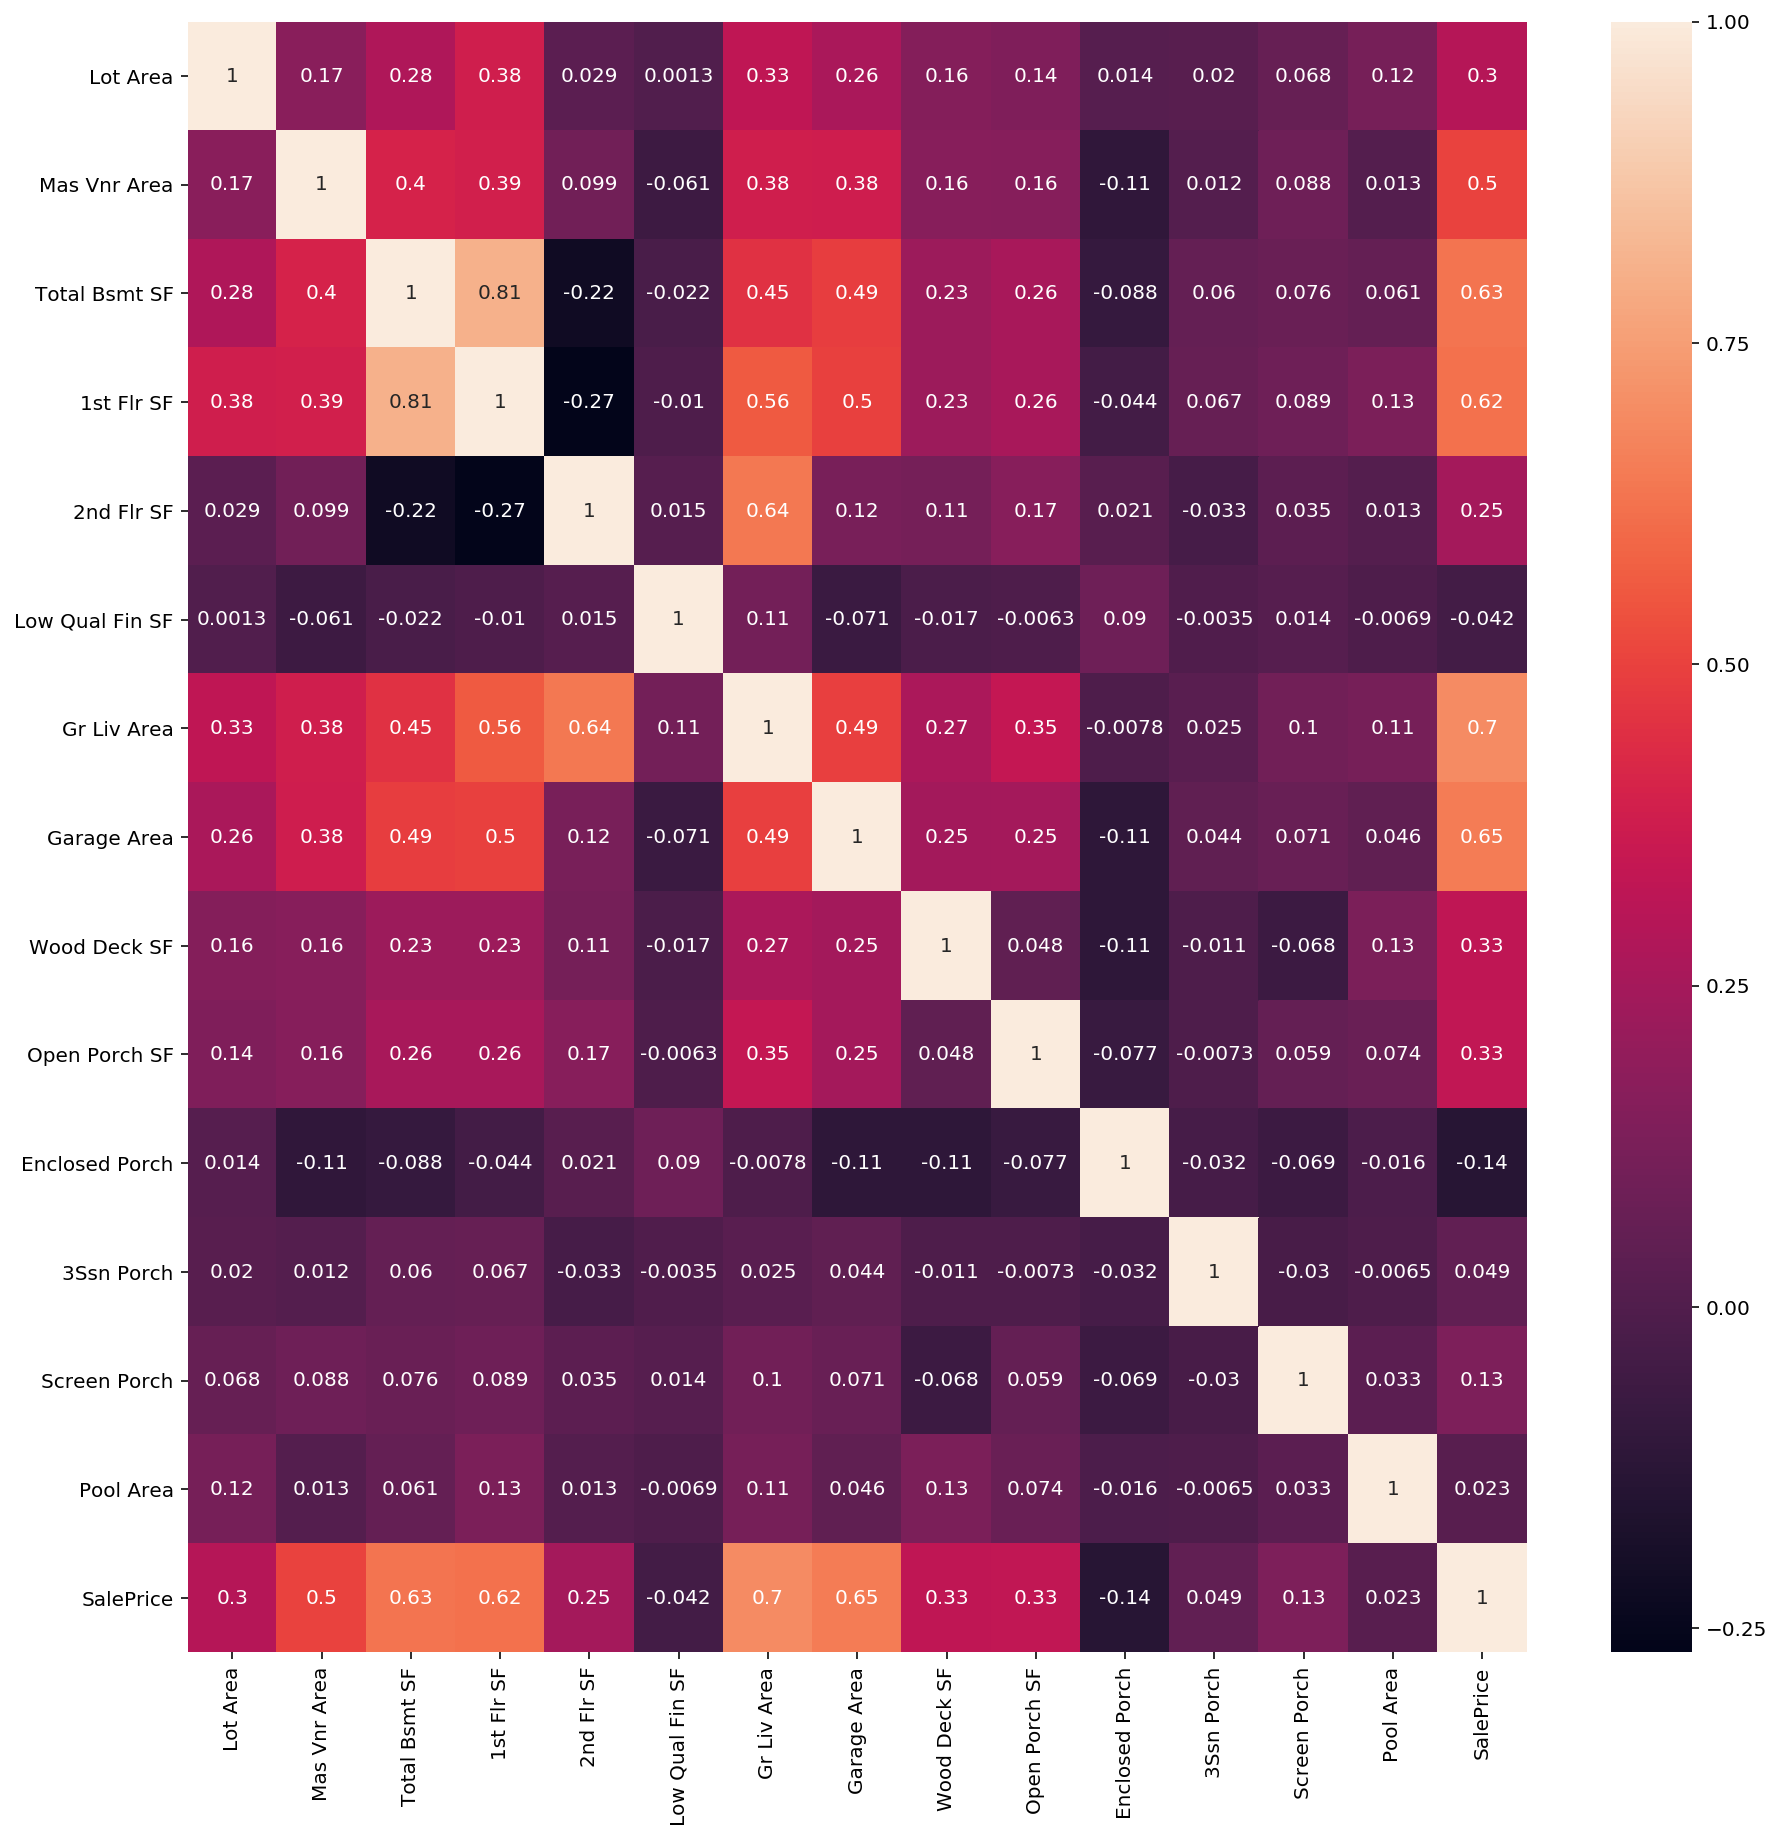

In [123]:
#Plotting correlation between area related variables with SalePrice
plt.figure(figsize=(15,15))
sns.heatmap(df_main[t_area2].corr(),annot=True)

Mas Vnr Area, Total Bsmt SF, 1st Flr SF, Gr Liv Area, Garage Area > 0.5 with SalePrice

In [124]:
t_area = ['Mas Vnr Area','Total Bsmt SF','Gr Liv Area','Garage Area']

#Assign main dataframe as df_train
df_train = df_main
#Create 'Total SF' by adding the area variable with >0.5correlation with SalePrice

#Train
df_train['Total SF'] = df_train[t_area[0]] + df_train[t_area[1]] + df_train[t_area[2]] + df_train[t_area[3]]
print(df_train.shape)

#Test
df_test['Total SF'] = df_test[t_area[0]] + df_test[t_area[1]] + df_test[t_area[2]] + df_test[t_area[3]]
print(df_test.shape)


(2051, 75)
(879, 74)


In [125]:
#Dropping all area columns since it is represented by Total SF
t_area2.remove('SalePrice')
for i in t_area2:
    df_train.drop(i,axis=1,inplace=True)
    df_test.drop(i,axis=1,inplace=True)

#Basement Square feet area are already tallied with Total Basement Square feet, hence can be removed
#Train
df_train.drop('BsmtFin SF 1',axis=1,inplace=True)
df_train.drop('BsmtFin SF 2',axis=1,inplace=True)
df_train.drop('Bsmt Unf SF',axis=1,inplace=True)
#Test
df_test.drop('BsmtFin SF 1',axis=1,inplace=True)
df_test.drop('BsmtFin SF 2',axis=1,inplace=True)
df_test.drop('Bsmt Unf SF',axis=1,inplace=True)

print(df_train.shape)
print(df_test.shape)

(2051, 58)
(879, 57)


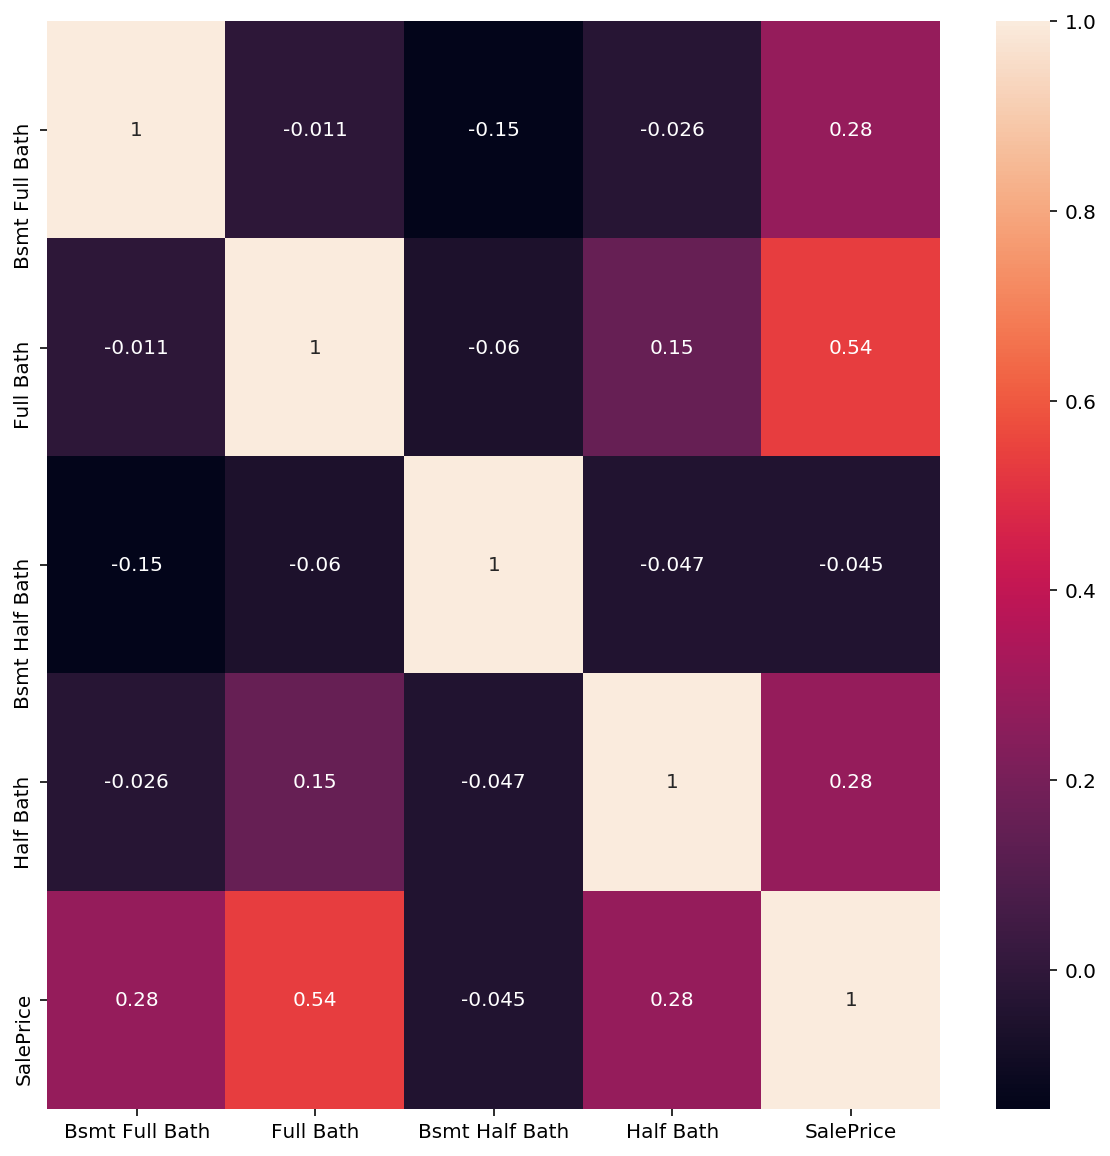

In [126]:
#Plot all no. of bath room related variable with SalePrice
bath = ['Bsmt Full Bath','Full Bath','Bsmt Half Bath','Half Bath','SalePrice']
plt.figure(figsize=(10,10))
sns.heatmap(df_main[bath].corr(),annot=True)

keep only Full Bath since the rest has low correlation with SalePrice

In [127]:
#Train
df_train.drop('Bsmt Full Bath',axis=1,inplace=True)
df_train.drop('Bsmt Half Bath',axis=1,inplace=True)
df_train.drop('Half Bath',axis=1,inplace=True)

#Test
df_test.drop('Bsmt Full Bath',axis=1,inplace=True)
df_test.drop('Bsmt Half Bath',axis=1,inplace=True)
df_test.drop('Half Bath',axis=1,inplace=True)

print(df_train.shape)
print(df_test.shape)

(2051, 55)
(879, 54)


In [128]:
#Compute Age of house when sold and check if remodification was done 
df_train['Age'] = df_train['Yr Sold'] - df_train['Year Built']
df_train['Remod'] = df_train['Year Remod/Add'] - df_train['Year Built']
df_train['Remod'] = [1 if i>0 else 0 for i in df_train['Remod']]

df_test['Age'] = df_test['Yr Sold'] - df_test['Year Built']
df_test['Remod'] = df_test['Year Remod/Add'] - df_test['Year Built']
df_test['Remod'] = [1 if i>0 else 0 for i in df_test['Remod']]

#Compute Age of Garage when sold
df_train['Age Garage'] = df_train['Yr Sold'] - df_train['Garage Yr Blt'].astype('int')
df_test['Age Garage'] = df_test['Yr Sold'] - df_test['Garage Yr Blt'].astype('int')

#Drop Yr Sold and Year Built
df_train.drop('Yr Sold',axis=1,inplace=True)
df_train.drop('Year Built',axis=1,inplace=True)
df_train.drop('Year Remod/Add',axis=1,inplace=True)
df_train.drop('Garage Yr Blt',axis=1,inplace=True)

df_test.drop('Yr Sold',axis=1,inplace=True)
df_test.drop('Year Built',axis=1,inplace=True)
df_test.drop('Year Remod/Add',axis=1,inplace=True)
df_test.drop('Garage Yr Blt',axis=1,inplace=True)

print(df_train.shape)
print(df_test.shape)

(2051, 54)
(879, 53)


In [129]:
df_train.head()

,MS SubClass,MS Zoning,Lot Frontage,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Full Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Misc Val,Mo Sold,Sale Type,SalePrice,Total SF,Age,Remod,Age Garage
0,60,RL,69.0552,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,2,3,1,Gd,6,Typ,0,Attchd,RFn,2.0,TA,TA,Y,0.0,3,WD,130500.0,2968.0,34,1,34
1,60,RL,43.0000,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,2,4,1,Gd,8,Typ,1,Attchd,RFn,2.0,TA,TA,Y,0.0,4,WD,220000.0,3726.0,13,1,12
2,20,RL,68.0000,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,1,3,1,Gd,5,Typ,0,Detchd,Unf,1.0,TA,TA,Y,0.0,1,WD,109000.0,2360.0,57,1,57
3,60,RL,73.0000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,2,3,1,TA,7,Typ,0,BuiltIn,Fin,2.0,TA,TA,Y,0.0,4,WD,174000.0,2228.0,4,1,3
4,50,RL,82.0000,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,2,3,1,TA,6,Typ,0,Detchd,Unf,2.0,TA,TA,N,0.0,3,WD,138500.0,2605.0,110,1,53


In [130]:
df_test.head()

,MS SubClass,MS Zoning,Lot Frontage,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Full Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Misc Val,Mo Sold,Sale Type,Total SF,Age,Remod,Age Garage
0,190,RM,69.000000,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,Gable,CompShg,AsbShng,AsbShng,None,TA,Fa,Stone,Fa,TA,No,Unf,Unf,GasA,Gd,N,FuseP,2,4,2,Fa,9,Typ,0,Detchd,Unf,1.0,Po,Po,Y,0,4,WD,3388.0,96,1,96
1,90,RL,69.630042,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,2,6,2,TA,10,Typ,0,Attchd,Fin,2.0,TA,TA,Y,0,8,WD,4514.0,29,0,29
2,60,RL,58.000000,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,Gd,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,2,3,1,Gd,7,Typ,1,Attchd,RFn,2.0,TA,TA,Y,0,9,New,2576.0,0,0,0
3,30,RM,60.000000,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,Gable,CompShg,Wd Sdng,Wd Sdng,None,Gd,TA,CBlock,TA,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,1,2,1,TA,5,Typ,0,Detchd,Unf,2.0,Fa,TA,N,0,7,WD,2416.0,84,1,72
4,20,RL,69.630042,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,Gable,CompShg,Plywood,Plywood,BrkFace,TA,TA,CBlock,Gd,TA,No,BLQ,Unf,GasA,Gd,Y,SBrkr,1,3,1,TA,6,Typ,2,Attchd,RFn,2.0,TA,TA,Y,0,7,WD,3549.0,46,0,46


#### 1.3.1) Label Encoding For Ordinal Variables

In [131]:
#Label Encoding for ordinal columns
Nominal = ['MS SubClass','MS Zoning', 'Street', 'Land Contour', 'Lot Config', 
               'Neighborhood', 'Condition 1', 'Condition 2','Bldg Type','House Style','Roof Style','Roof Matl',
               'Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation',
               'Heating','Central Air','Garage Type','Misc Feature','Sale Type','Mo Sold','Bsmt Full Bath',
               'Bsmt Half Bath','Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr',
               'TotRms AbvGrd','Fireplaces','Garage Yr Blt','Garage Cars']

ordinal = ['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Qual','Exter Cond','Bsmt Qual',
           'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical','Kitchen Qual',
          'Functional','Garage Finish','Garage Qual','Garage Cond']

#Train
df_train['Lot Shape'] = df_train['Lot Shape'].map({'IR3':1,'IR2':2,'IR1':3,'Reg':4})
df_train['Utilities'] = df_train['Utilities'].map({'ELO':1,'NoSeWa':2,'NoSewr':3,'AllPub':4})
df_train['Land Slope'] = df_train['Land Slope'].map({'Sev':1,'Mod':2,'Gtl':3})
df_train['Exter Qual'] = df_train['Exter Qual'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_train['Exter Cond'] = df_train['Exter Cond'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_train['Bsmt Qual'] = df_train['Bsmt Qual'].map({'NA':0,'Po':1,'Fa':2,'Ex':3,'Gd':4,'TA':5})
df_train['Bsmt Cond'] = df_train['Bsmt Cond'].map({'NA':0,'Po':1,'Fa':2,'Ex':3,'Gd':4,'TA':5})
df_train['Bsmt Exposure'] = df_train['Bsmt Exposure'].map({'NA':0,'Unf':1,'No':2,'Mn':3,'Av':4,'Gd':5})
df_train['BsmtFin Type 1'] = df_train['BsmtFin Type 1'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df_train['BsmtFin Type 2'] = df_train['BsmtFin Type 2'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df_train['Heating QC'] = df_train['Heating QC'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_train['Electrical'] = df_train['Electrical'].map({'Mix':1,'FuseP':2,'FuseF':3,'FuseA':4,'SBrkr':5})
df_train['Kitchen Qual'] = df_train['Kitchen Qual'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_train['Functional'] = df_train['Functional'].map({'Sal':1,'Sev ':2,'Maj2':3,'Maj1':4,'Mod':5,'Min2':6,'Min1':7,'Typ':8})
df_train['Garage Finish'] = df_train['Garage Finish'].map({'NA':1,'Unf':2,'RFn':3,'Fin':4})
df_train['Garage Qual'] = df_train['Garage Qual'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_train['Garage Cond'] = df_train['Garage Cond'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

#Test
df_test['Lot Shape'] = df_test['Lot Shape'].map({'IR3':1,'IR2':2,'IR1':3,'Reg':4})
df_test['Utilities'] = df_test['Utilities'].map({'ELO':1,'NoSeWa':2,'NoSewr':3,'AllPub':4})
df_test['Land Slope'] = df_test['Land Slope'].map({'Sev':1,'Mod':2,'Gtl':3})
df_test['Exter Qual'] = df_test['Exter Qual'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_test['Exter Cond'] = df_test['Exter Cond'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_test['Bsmt Qual'] = df_test['Bsmt Qual'].map({'NA':0,'Po':1,'Fa':2,'Ex':3,'Gd':4,'TA':5})
df_test['Bsmt Cond'] = df_test['Bsmt Cond'].map({'NA':0,'Po':1,'Fa':2,'Ex':3,'Gd':4,'TA':5})
df_test['Bsmt Exposure'] = df_test['Bsmt Exposure'].map({'NA':0,'Unf':1,'No':2,'Mn':3,'Av':4,'Gd':5})
df_test['BsmtFin Type 1'] = df_test['BsmtFin Type 1'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df_test['BsmtFin Type 2'] = df_test['BsmtFin Type 2'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df_test['Heating QC'] = df_test['Heating QC'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_test['Electrical'] = df_test['Electrical'].map({'Mix':1,'FuseP':2,'FuseF':3,'FuseA':4,'SBrkr':5})
df_test['Kitchen Qual'] = df_test['Kitchen Qual'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_test['Functional'] = df_test['Functional'].map({'Sal':1,'Sev ':2,'Maj2':3,'Maj1':4,'Mod':5,'Min2':6,'Min1':7,'Typ':8})
df_test['Garage Finish'] = df_test['Garage Finish'].map({'NA':1,'Unf':2,'RFn':3,'Fin':4})
df_test['Garage Qual'] = df_test['Garage Qual'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_test['Garage Cond'] = df_test['Garage Cond'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

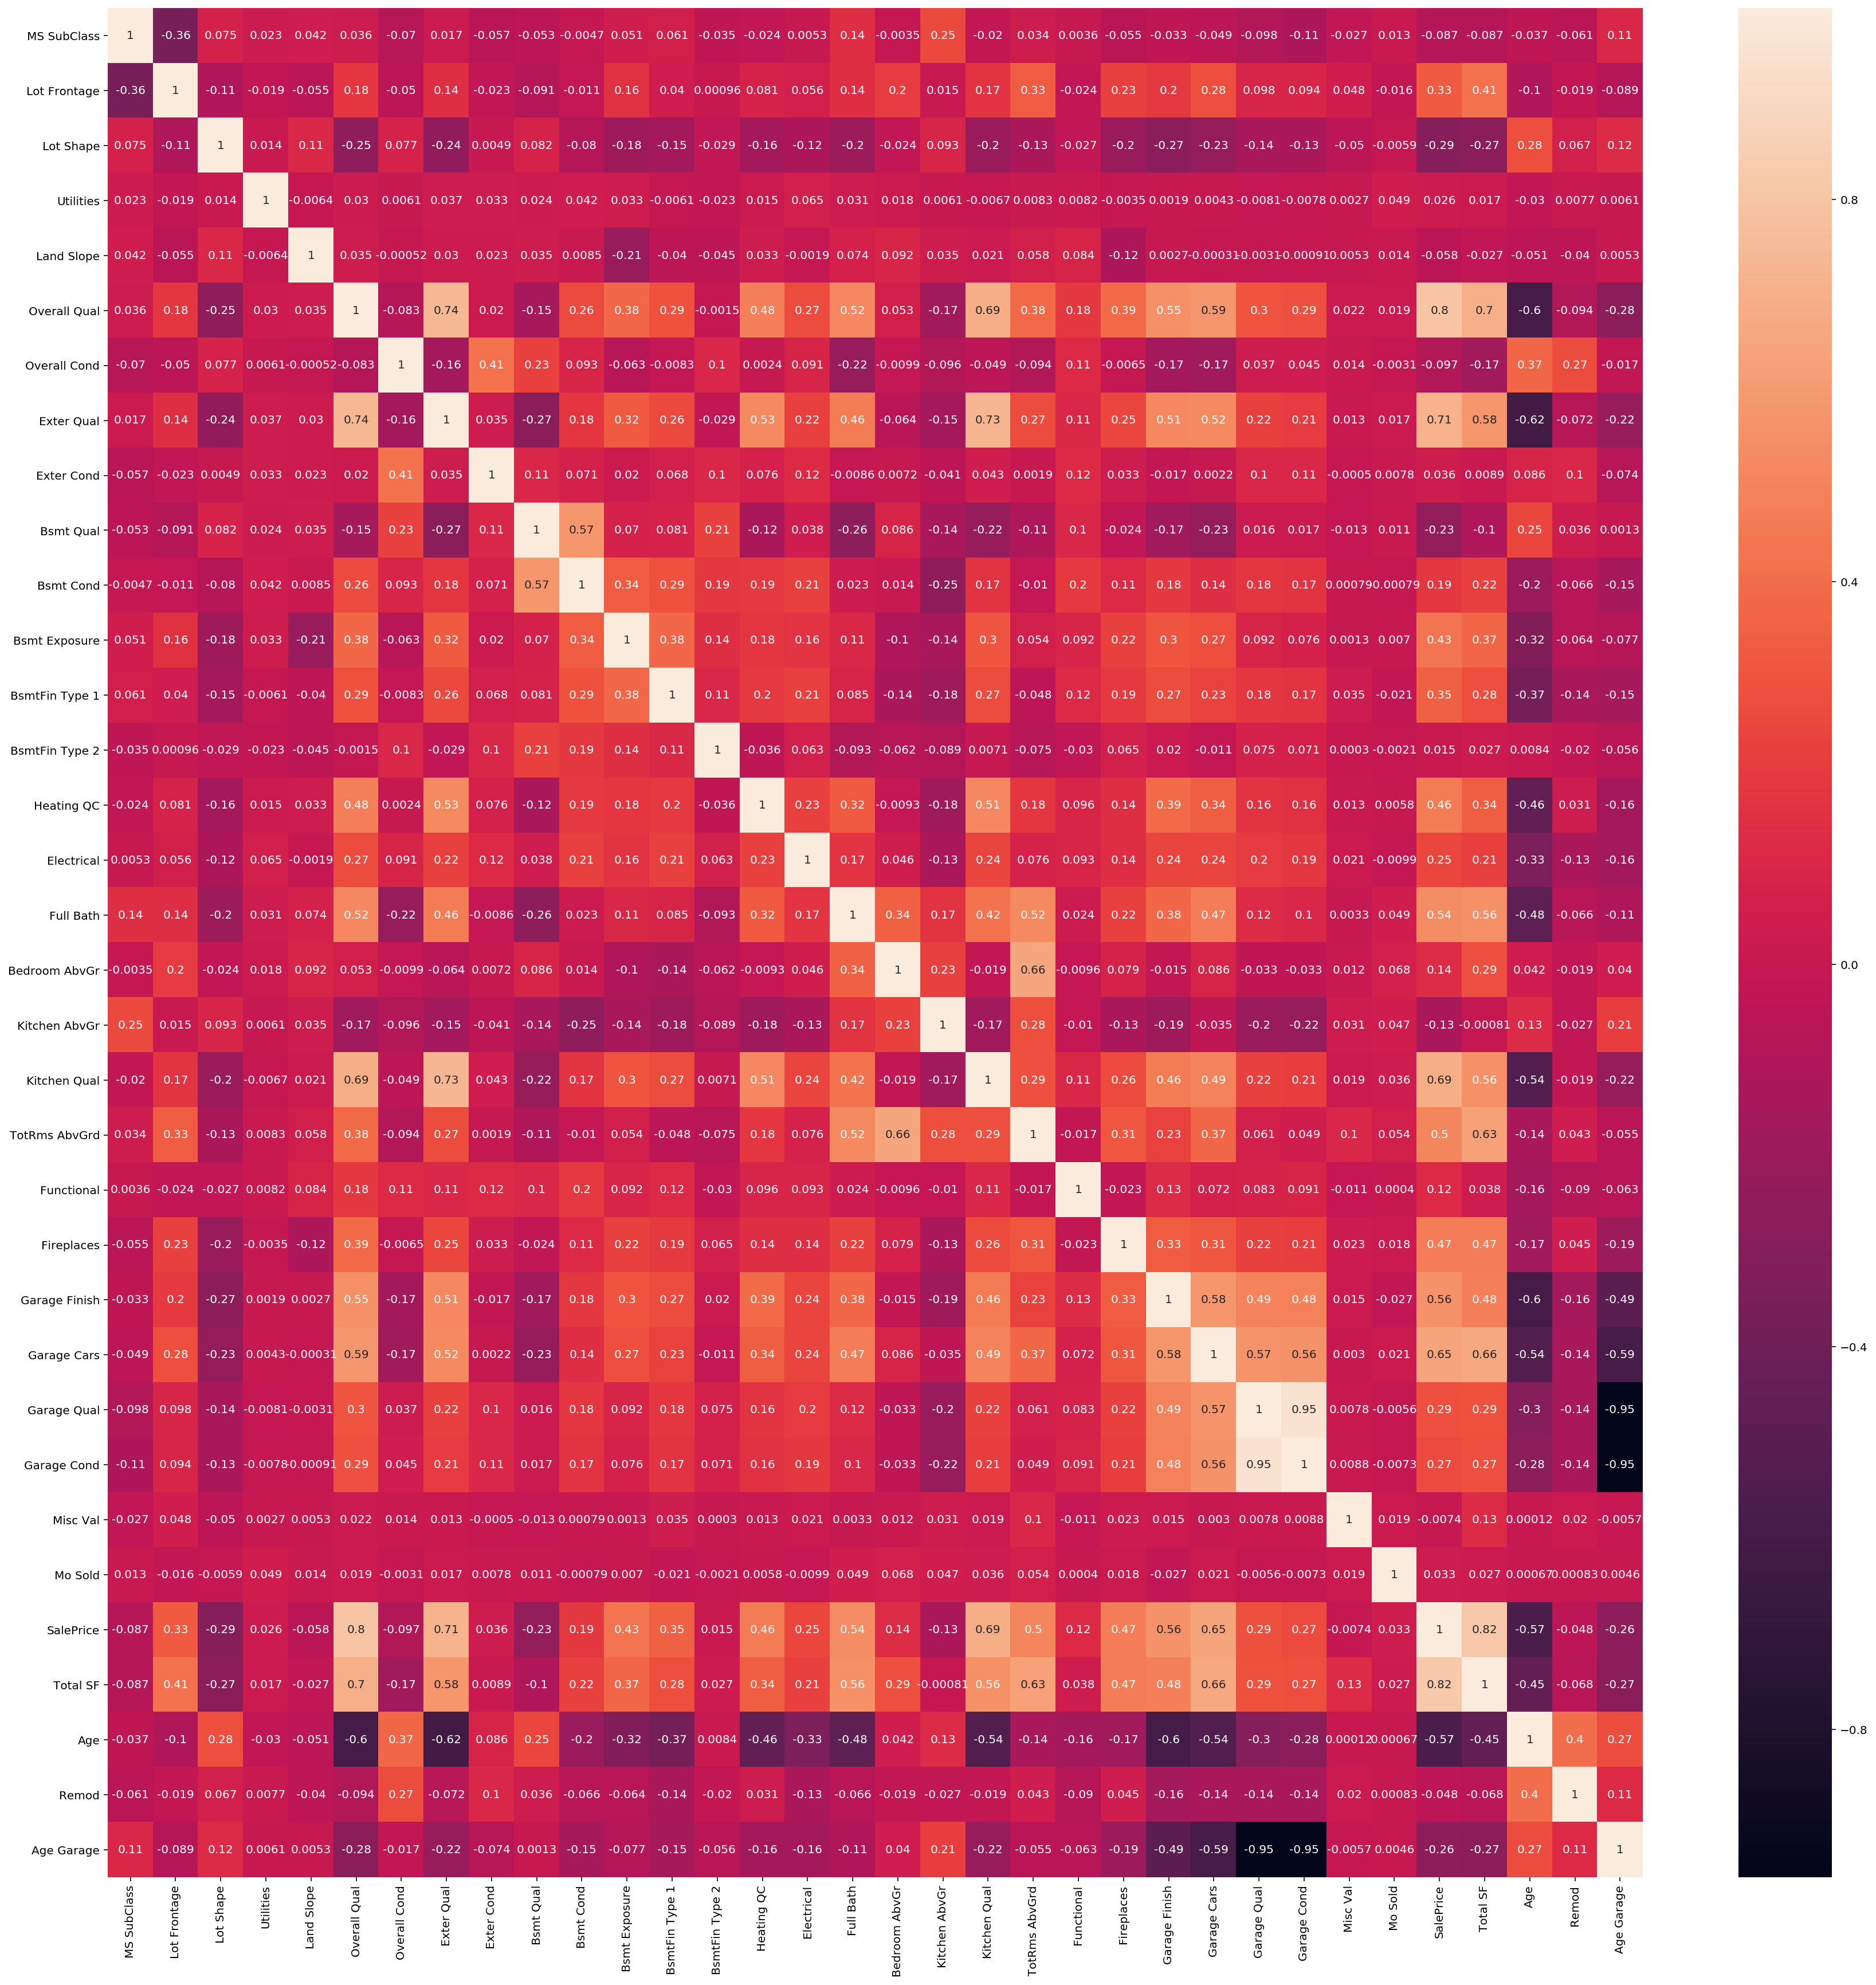

In [132]:
#Check correlation of remaining numerical values with SalesPrice
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(), annot=True)

Keeping variables with more than 0.45 correlation with SalePrice:

**'Overall Qual', 'Exter Qual', 'Heating QC', 'Full Bath','Kitchen Qual','Fireplaces','Garage Finish','Garage Cars','TotRms AbvGrd','Total SF','Age'**

Total rooms above ground and bedroom above ground are correlated with 0.66 value, hence only total rooms above ground will be kept.

In [133]:
#Remove all unwanted ordinal and numerical values
main_list = df_train.columns.tolist()
main_list2 = df_train.columns.tolist()
keep = ['Age','Overall Qual','Kitchen Qual','Total SF','Fireplaces','Garage Finish','Garage Cars',
       'Exter Qual','TotRms AbvGrd','Full Bath','SalePrice','Heating QC']
for i in main_list:
    if i in ordinal or i in numerical:
        main_list2.remove(i)
    if i in keep and i not in main_list2:
        main_list2.append(i)

#Train
main_list2.remove('Bedroom AbvGr')
df_train2 = df_train[main_list2]
#Test
main_list2.remove('SalePrice')
df_test = df_test[main_list2]
print(df_train2.shape)
print(df_test.shape)

(2051, 37)
(879, 36)


#### 1.3.2) Removing Outliers

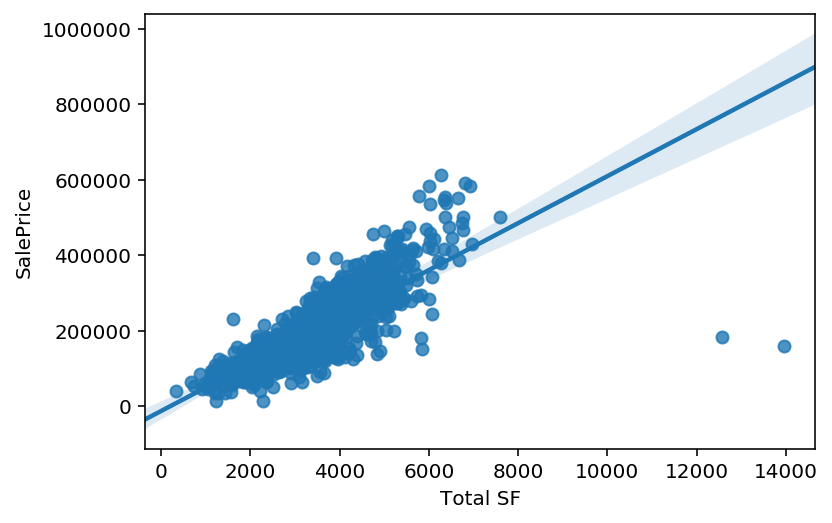

In [134]:
sns.regplot(df_train2['Total SF'], df_train2['SalePrice'])

In [135]:
#Find Outliers in Total SF
df_train2[df_train2['Total SF'] >12000]

,MS SubClass,MS Zoning,Street,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Central Air,Full Bath,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Type,Garage Cars,Paved Drive,Mo Sold,Sale Type,Total SF,Age,Remod,Age Garage,Overall Qual,Exter Qual,Heating QC,Kitchen Qual,Garage Finish,SalePrice
960,60,RL,Pave,Bnk,Corner,Edwards,Feedr,Norm,1Fam,2Story,Hip,ClyTile,Stucco,Stucco,Stone,PConc,GasA,Y,2,1,12,3,Attchd,2.0,Y,1,New,13966.0,0,0,0,10,5,5,5,4,160000.0
1885,20,RL,Pave,Bnk,Inside,Edwards,Norm,Norm,1Fam,1Story,Hip,CompShg,CemntBd,CmentBd,Stone,PConc,GasA,Y,2,1,15,2,Attchd,3.0,Y,10,New,12568.0,-1,1,-1,10,5,5,5,4,183850.0


In [136]:
#Drop rows with outliers
df_train2.drop(960,axis=0,inplace=True)
df_train2.drop(1885,axis=0,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     21
2       9
1       4
Name: Overall Qual, dtype: int64

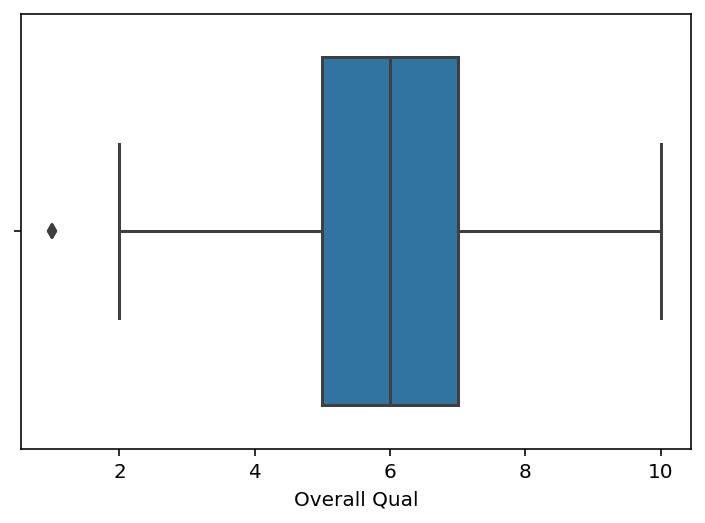

In [137]:
sns.boxplot(df_train2['Overall Qual'])
df_train2['Overall Qual'].value_counts()

In [138]:
#Remove outlier where overall Qual = 1
df_train2[df_train2['Overall Qual']==1]

,MS SubClass,MS Zoning,Street,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Central Air,Full Bath,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Type,Garage Cars,Paved Drive,Mo Sold,Sale Type,Total SF,Age,Remod,Age Garage,Overall Qual,Exter Qual,Heating QC,Kitchen Qual,Garage Finish,SalePrice
183,20,A (agr),Pave,Low,Inside,IDOTRR,Norm,Norm,1Fam,1Story,Gable,CompShg,AsbShng,VinylSd,None,Slab,Wall,N,1,1,4,0,Attchd,2.0,N,2,WD,1220.0,56,0,56,1,2,1,2,2,13100.0
635,20,A (agr),Pave,Lvl,Inside,Mitchel,Artery,Norm,1Fam,1Story,Gable,CompShg,CBlock,VinylSd,None,CBlock,GasA,Y,1,1,6,0,Attchd,1.0,N,5,WD,1870.0,55,0,55,1,3,3,3,2,81500.0
1372,30,RL,Pave,Low,Inside,Edwards,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,BrkTil,GasA,N,0,1,4,0,NA,0.0,Y,3,WD,1587.0,87,1,2009,1,2,4,2,1,61000.0
1428,20,RL,Pave,Low,Inside,BrkSide,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Slab,GasA,N,1,1,2,0,NA,0.0,N,1,WD,334.0,61,1,2007,1,2,2,2,1,39300.0


In [139]:
#Drop rows
df_train2.drop(183,axis=0,inplace=True)
df_train2.drop(635,axis=0,inplace=True)
df_train2.drop(1372,axis=0,inplace=True)
df_train2.drop(1428,axis=0,inplace=True)

df_train2.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(2045, 37)

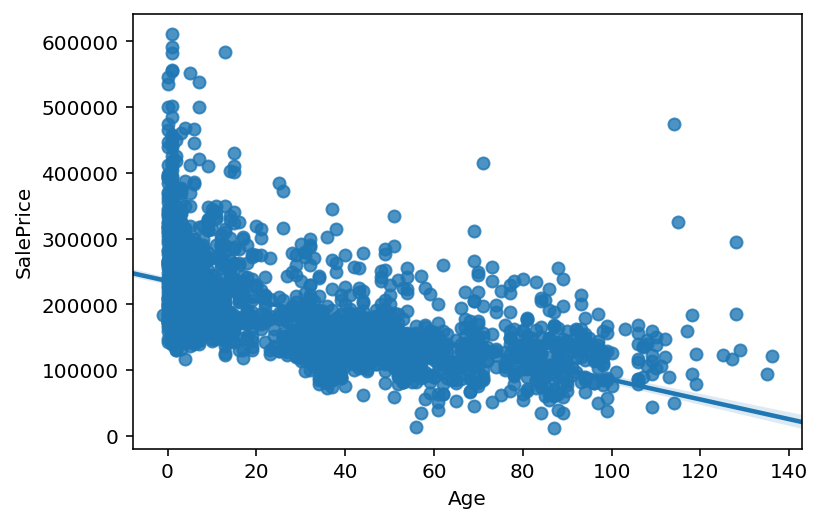

In [140]:
#Find relationship between Age and SalePrice
sns.regplot(df_train['Age'], df_train['SalePrice'])

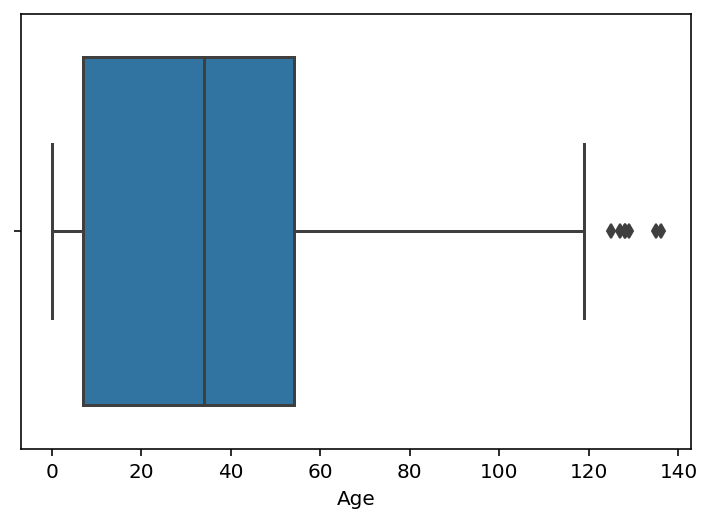

In [141]:
sns.boxplot(df_train2['Age'])

In [142]:
#Find outlier in Age
df_train2[df_train2['Age']>120]

,MS SubClass,MS Zoning,Street,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Central Air,Full Bath,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Type,Garage Cars,Paved Drive,Mo Sold,Sale Type,Total SF,Age,Remod,Age Garage,Overall Qual,Exter Qual,Heating QC,Kitchen Qual,Garage Finish,SalePrice
12,70,RL,Pave,Bnk,FR2,SawyerW,Feedr,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,None,PConc,GasA,Y,1,1,7,1,Attchd,2.0,P,6,WD,2592.0,129,1,109,5,4,5,3,2,131000.0
136,50,RL,Pave,Lvl,Inside,Sawyer,Feedr,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,CBlock,GasA,N,1,1,6,0,NA,0.0,N,5,WD,1800.0,135,1,2010,5,3,4,3,1,94000.0
394,190,RM,Pave,Lvl,Inside,OldTown,Norm,Norm,2fmCon,2Story,Gable,CompShg,VinylSd,AsbShng,None,PConc,GasA,Y,2,2,11,0,Detchd,2.0,N,4,WD,3627.0,125,1,39,4,3,4,3,2,122500.0
784,70,RM,Pave,Lvl,Inside,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,BrkTil,GasW,Y,2,1,8,0,Detchd,1.0,N,5,WD,3423.0,127,1,77,6,3,3,2,2,117500.0
951,70,RM,Pave,Lvl,Inside,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,BrkTil,OthW,N,2,1,8,0,NA,0.0,Y,12,WD,3042.0,136,1,2008,8,3,2,3,1,122000.0
1134,75,RM,Pave,Lvl,Corner,OldTown,Norm,Norm,1Fam,2.5Unf,Gable,CompShg,Wd Sdng,Wd Sdng,None,PConc,GasA,Y,2,1,8,1,Attchd,2.0,N,2,WD,3849.0,128,1,57,7,3,3,3,2,185000.0
1939,75,RM,Pave,Lvl,Inside,OldTown,Norm,Norm,1Fam,2.5Fin,Gable,CompShg,CemntBd,CmentBd,None,BrkTil,GasA,Y,3,1,10,1,Attchd,3.0,Y,5,WD,5833.0,128,1,5,7,3,5,4,2,295000.0


In [143]:
#Drop rows
df_train2.drop(12,axis=0,inplace=True)
df_train2.drop(136,axis=0,inplace=True)
df_train2.drop(394,axis=0,inplace=True)
df_train2.drop(784,axis=0,inplace=True)
df_train2.drop(951,axis=0,inplace=True)
df_train2.drop(1134,axis=0,inplace=True)
df_train2.drop(1939,axis=0,inplace=True)

df_train2.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(2038, 37)

#### 1.3.3) Further EDA of variables

Plotting histgram of each variables to see if the distribution are skewed. Variables will be removed if the variables' distribution surpass 70% of the observations for 1 category. 

In [144]:
#Define function to plot subplot of histogram
def subplot_histograms(dataframe, list_of_columns, list_of_titles):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize = (10,50) ) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        dataframe[column].value_counts().plot('bar',ax=ax[i])
        #ax[i].hist(dataframe[column], label = list_of_xlabels[i], bins = 20) # feel free to add more settings
        ax[i].set_title(list_of_titles[i],fontsize = 10,fontweight = 4, y = 1.01,alpha=0.8) # Set titles, labels, etc here for each subplot
        #ax[i].set_xlabel(list_of_xlabels[i],fontsize = 5,fontweight = 2, alpha=0.8)
        ax[i].set_ylabel('No. of occurrance',fontsize = 5,fontweight = 2, alpha=0.8)
        ax[i].axhline(y=1400,color='r')

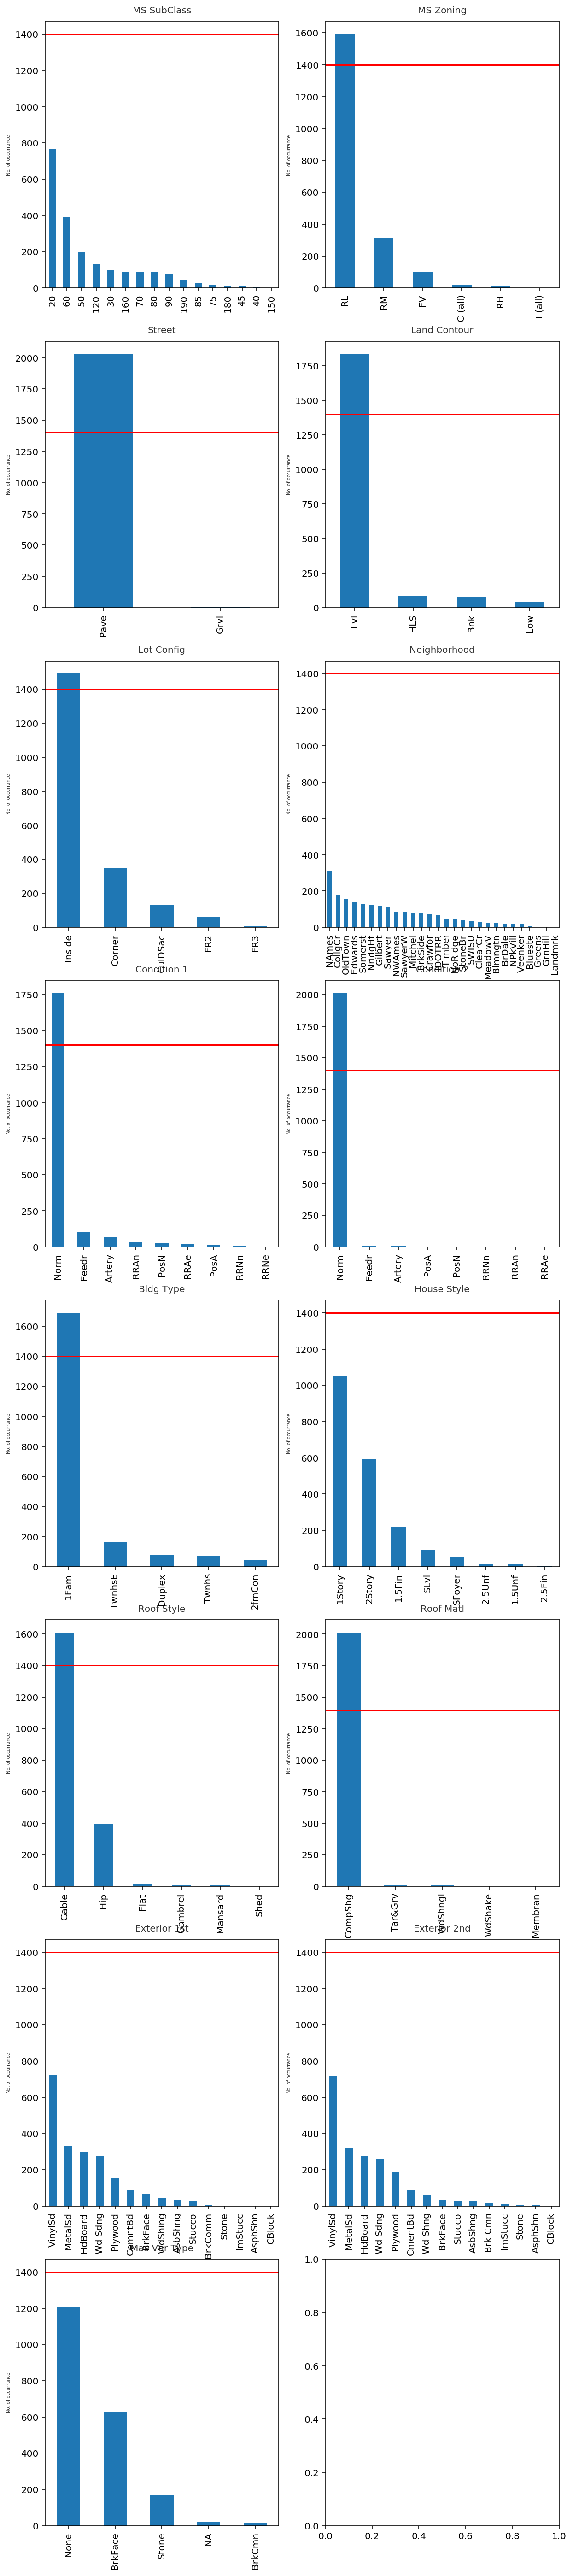

In [145]:
#Plotting histogram for all variables by 2 separate subplot
subplot_histograms(df_train2,df_train2.columns[0:15].tolist(),df_train2.columns[0:15].tolist())

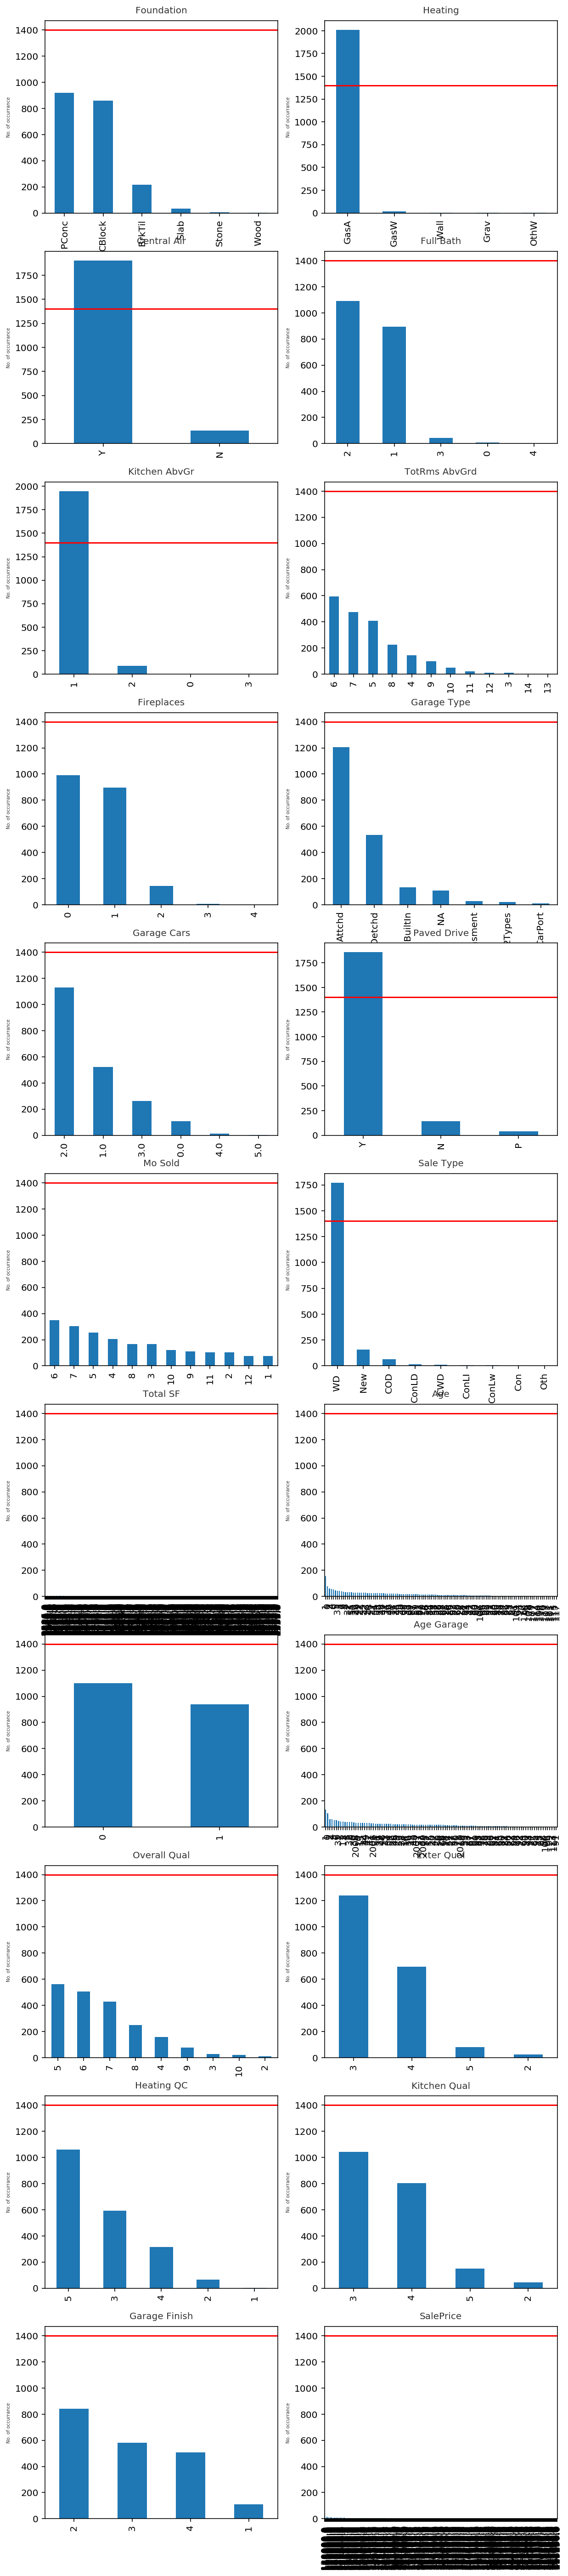

In [146]:
subplot_histograms(df_train2,df_train2.columns[15:].tolist(),df_train2.columns[15:].tolist())

Variables to keep:

'MS SubClass', 'Neighborhood','House Style', 'Mas Vnr Type', 'Exterior 1st', 'Exterior 2nd', 'Foundation', 'TotRms AbvGrd', 'Garage Type', 'Heating QC', 'Mo Sold','Remod', 'Full Bath', 'Age', 'Overall Qual', 'Kitchen Qual', 'Total SF', 'Fireplaces', 'Garage Finish' 'Garage Cars', 'Exter Qual', 'SalePrice'

In [147]:
#Keep only columns which did not cross the red line (where no. of observation > 60%)
predictors=['MS SubClass','Neighborhood','House Style','Mas Vnr Type','Exterior 1st','Exterior 2nd','Foundation',
            'TotRms AbvGrd','Garage Type','Heating QC','Mo Sold','Remod','Full Bath','Age','Overall Qual',
            'Kitchen Qual','Total SF','Fireplaces','Garage Finish','Garage Cars','Exter Qual','SalePrice']


test_predictors=['MS SubClass','Neighborhood','House Style','Mas Vnr Type','Exterior 1st','Exterior 2nd','Foundation',
                'TotRms AbvGrd','Garage Type','Heating QC','Mo Sold','Remod','Full Bath','Age','Overall Qual',
                 'Kitchen Qual','Total SF','Fireplaces','Garage Finish','Garage Cars','Exter Qual']

In [148]:
#Remove unwanted columns
df_train2 = df_train2[predictors]
df_test2 = df_test[test_predictors]
print(df_train2.shape)
print(df_test2.shape)

(2038, 22)
(879, 21)


**Summary for EDA**

21 variables are left after EDA elimination. Among them are 2 continuous, 9 ordinal and 10 nominal variables; these variables should be well represented variables of Sale Price based on the EDA analysis above. Further elimination of variables will be done after one hot encoding of categorical variables with lasso selection. 

## 2.One Hot Encoding for Categorical Variables

In [149]:
#Create lists to separate categorical and numerical variables
numerical = ['Full Bath','Age','Overall Qual','Kitchen Qual','Total SF',
             'Garage Finish','Garage Cars','Exter Qual','SalePrice','TotRms AbvGrd']
cat = [x for x in df_train2 if x not in numerical]
cat

['MS SubClass',
 'Neighborhood',
 'House Style',
 'Mas Vnr Type',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Garage Type',
 'Heating QC',
 'Mo Sold',
 'Remod',
 'Fireplaces']

In [150]:
#Convert all categorical data type into String for One Hot Encoding
for i in cat:
    df_train2[i] = df_train2[i].astype('str',inplace=True)
    df_test2[i] = df_test2[i].astype('str',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [151]:
#One hot Encoding for all categorical variables
df_train2 = pd.get_dummies(df_train2,cat)
df_test2 = pd.get_dummies(df_test2,cat)
df_train2.head()

,TotRms AbvGrd,Full Bath,Age,Overall Qual,Kitchen Qual,Total SF,Garage Finish,Garage Cars,Exter Qual,SalePrice,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_NA,Mas Vnr Type_None,Mas Vnr Type_Stone,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Heating QC_1,Heating QC_2,Heating QC_3,Heating QC_4,Heating QC_5,Mo Sold_1,Mo Sold_10,Mo Sold_11,Mo Sold_12,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Remod_0,Remod_1,Fireplaces_0,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4
0,6,2,34,6,4,2968.0,3,2.0,4,130500.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
1,8,2,13,7,4,3726.0,3,2.0,4,220000.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
2,5,1,57,5,4,2360.0,2,1.0,3,109000.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,7,2,4,5,3,2228.0,4,2.0,3,174000.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
4,6,2,110,6,3,2605.0,2,2.0,3,138500.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0


In [152]:
df_test2.head()

,TotRms AbvGrd,Full Bath,Age,Overall Qual,Kitchen Qual,Total SF,Garage Finish,Garage Cars,Exter Qual,MS SubClass_120,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_NA,Mas Vnr Type_None,Mas Vnr Type_Stone,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Heating QC_2,Heating QC_3,Heating QC_4,Heating QC_5,Mo Sold_1,Mo Sold_10,Mo Sold_11,Mo Sold_12,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Remod_0,Remod_1,Fireplaces_0,Fireplaces_1,Fireplaces_2,Fireplaces_3
0,9,2,96,6,2,3388.0,2,1.0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
1,10,2,29,5,3,4514.0,4,2.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
2,7,2,0,7,4,2576.0,3,2.0,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
3,5,1,84,5,3,2416.0,2,2.0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,6,1,46,6,3,3549.0,3,2.0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [153]:
print(df_train2.shape)
print(df_test2.shape)

(2038, 134)
(879, 128)


In [154]:
#Find missing column for both Train and Test datasets
print('Columns missing in test dataset:')
for i in df_train2:
    if i not in df_test2.columns and i != 'SalePrice':
        df_test2[i] = 0 #Fill the whole missing column with 0
        print(i)
print('\n')       
print('Columns missing in train dataset:')
for i  in df_test2:
    if i not in df_train2.columns:
        df_train2[i] = 0 #Fill the whole missing column with 0
        print(i)

Columns missing in test dataset:
MS SubClass_150
Neighborhood_GrnHill
Neighborhood_Landmrk
Exterior 1st_CBlock
Exterior 1st_ImStucc
Exterior 1st_Stone
Exterior 2nd_Stone
Heating QC_1
Fireplaces_4


Columns missing in train dataset:
Mas Vnr Type_CBlock
Exterior 1st_PreCast
Exterior 2nd_Other
Exterior 2nd_PreCast


In [155]:
print(df_train2.shape)
print(df_test2.shape)

(2038, 138)
(879, 137)


## 3.Features Engineering with Lasso

In [156]:
#Prepare X,y to fit into lasso
X = df_train2[[i for i in df_train2 if i != 'SalePrice']]
y = df_train2['SalePrice']

In [157]:
#Initialising Lasso model and find optimal alpha
l_alphas = np.arange(0.001, 0.15, 0.0025)
lasso_model = LassoCV(alphas=l_alphas, cv=5)
lasso_model = lasso_model.fit(X,y)
lasso_optimal_alpha = lasso_model.alpha_
lasso= Lasso(alpha=lasso_optimal_alpha)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92385238351.74377, tolerance: 1020092536.0321932
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92380093978.38123, tolerance: 1020092536.0321932
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25161719288.249756, tolerance: 1020092536.0321932
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You migh

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24967466651.333984, tolerance: 1046784387.254831
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 148597362541.4463, tolerance: 1046784387.254831
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1540292932.776245, tolerance: 1046784387.254831
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might w

In [158]:
#Scaling of X
ss = StandardScaler()
ss.fit(X)
Xs = ss.transform(X)

In [159]:
#Model Fitting
lasso.fit(Xs,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83644520143.85693, tolerance: 1276994842.760338
  positive)


Lasso(alpha=0.1485, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

(array([ 4., 55., 71.,  4.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([-10324.09801132,  -5305.74390575,   -287.38980017,   4730.9643054 ,
          9749.31841098,  14767.67251655,  19786.02662212,  24804.3807277 ,
         29822.73483327,  34841.08893885,  39859.44304442]),
 <a list of 10 Patch objects>)

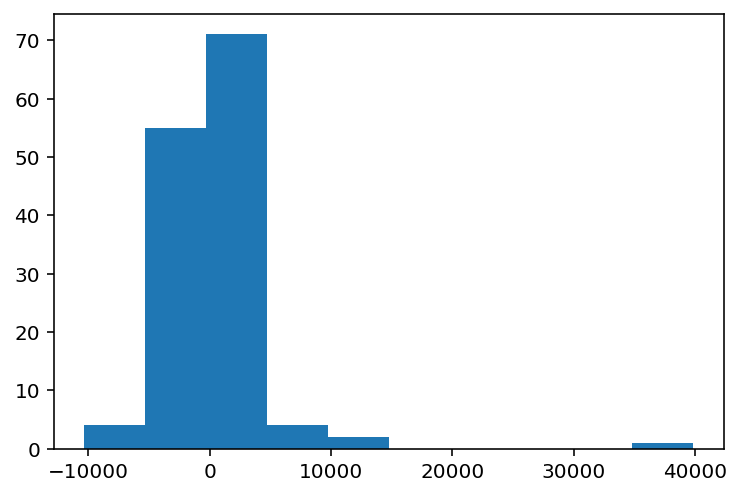

In [160]:
#Plotting of coefficients
plt.hist(lasso.coef_)

In [161]:
#Check Score of model
lasso.score(Xs,y)

0.8955144296475341

In [162]:
#Show top 30 variables with the highest coefficient (Absolute values) values
df_lasso = pd.DataFrame(lasso.coef_,index=[i for i in df_train2 if i != 'SalePrice'],columns = ['coef'])
df_lasso['abscoef'] = df_lasso['coef'].abs()
#Local the top 30 variables with highest coefficients and assign it to a list
features2 = df_lasso['abscoef'].sort_values(ascending=False).head(30).index.tolist()
df_lasso['abscoef'].sort_values(ascending=False).head(30)

Total SF                39859.443044
Overall Qual            13680.860093
Exterior 1st_CemntBd    12534.917871
Exterior 2nd_CmentBd    10324.098011
Kitchen Qual             7782.905522
Neighborhood_StoneBr     7598.570811
Age                      7442.997099
MS SubClass_120          7312.004993
MS SubClass_160          7051.720915
Neighborhood_NridgHt     6731.487958
Exter Qual               6133.720011
Fireplaces_2             3690.779716
Fireplaces_0             3641.989002
Exterior 1st_BrkFace     3620.983638
Neighborhood_GrnHill     3596.870078
Foundation_Slab          3578.420384
Exterior 2nd_AsbShng     3575.398235
Mas Vnr Type_BrkFace     3486.246642
MS SubClass_90           3402.242511
Neighborhood_OldTown     3393.555456
Garage Finish            3246.564598
Garage Type_NA           3225.146317
Exterior 1st_AsbShng     3143.111323
Neighborhood_Crawfor     3138.197458
Neighborhood_NAmes       3129.784544
Neighborhood_NoRidge     3061.773185
House Style_1Story       2987.413452
R

## 4.Preparing Data For Modelling Selections

In [163]:
#Delcare df_train3, df_test3 as dataframe with only the selected features
df_train3 = df_train2[features2]
df_test3 = df_test2[features2]
df_train3['SalePrice'] = df_train2['SalePrice']
df_train3.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Total SF,Overall Qual,Exterior 1st_CemntBd,Exterior 2nd_CmentBd,Kitchen Qual,Neighborhood_StoneBr,Age,MS SubClass_120,MS SubClass_160,Neighborhood_NridgHt,Exter Qual,Fireplaces_2,Fireplaces_0,Exterior 1st_BrkFace,Neighborhood_GrnHill,Foundation_Slab,Exterior 2nd_AsbShng,Mas Vnr Type_BrkFace,MS SubClass_90,Neighborhood_OldTown,Garage Finish,Garage Type_NA,Exterior 1st_AsbShng,Neighborhood_Crawfor,Neighborhood_NAmes,Neighborhood_NoRidge,House Style_1Story,Remod_0,Exterior 1st_VinylSd,House Style_SLvl,SalePrice
0,2968.0,6,0,0,4,0,34,0,0,0,4,0,1,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0,130500.0
1,3726.0,7,0,0,4,0,13,0,0,0,4,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,1,0,220000.0
2,2360.0,5,0,0,4,0,57,0,0,0,3,0,1,0,0,0,0,0,0,0,2,0,0,0,1,0,1,0,1,0,109000.0
3,2228.0,5,0,0,3,0,4,0,0,0,3,0,1,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,1,0,174000.0
4,2605.0,6,0,0,3,0,110,0,0,0,3,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,138500.0


In [164]:
df_test3.head()

,Total SF,Overall Qual,Exterior 1st_CemntBd,Exterior 2nd_CmentBd,Kitchen Qual,Neighborhood_StoneBr,Age,MS SubClass_120,MS SubClass_160,Neighborhood_NridgHt,Exter Qual,Fireplaces_2,Fireplaces_0,Exterior 1st_BrkFace,Neighborhood_GrnHill,Foundation_Slab,Exterior 2nd_AsbShng,Mas Vnr Type_BrkFace,MS SubClass_90,Neighborhood_OldTown,Garage Finish,Garage Type_NA,Exterior 1st_AsbShng,Neighborhood_Crawfor,Neighborhood_NAmes,Neighborhood_NoRidge,House Style_1Story,Remod_0,Exterior 1st_VinylSd,House Style_SLvl
0,3388.0,6,0,0,2,0,96,0,0,0,3,0,1,0,0,0,1,0,0,1,2,0,1,0,0,0,0,0,0,0
1,4514.0,5,0,0,3,0,29,0,0,0,3,0,1,0,0,0,0,0,1,0,4,0,0,0,0,0,1,1,0,0
2,2576.0,7,0,0,4,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,1,0
3,2416.0,5,0,0,3,0,84,0,0,0,4,0,1,0,0,0,0,0,0,1,2,0,0,0,0,0,1,0,0,0
4,3549.0,6,0,0,3,0,46,0,0,0,3,1,0,0,0,0,0,1,0,0,3,0,0,0,1,0,1,1,0,0


In [165]:
print(df_train3.shape)
print(df_test3.shape)

(2038, 31)
(879, 30)


In [166]:
#Assign X,y for modelling
X = df_train3[[i for i in df_train3 if i !='SalePrice']]
y = df_train3['SalePrice']

## 5.Model Prep: Train/Test Split

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [168]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

## 6.Model Prep: Instantiate models

In [169]:
lr = LinearRegression()

In [170]:
l_alphas = np.arange(0.001, 0.15, 0.0025)
lasso_model = LassoCV(alphas=l_alphas, cv=5)
lasso_model = lasso_model.fit(X_train,y_train)
lasso_optimal_alpha = lasso_model.alpha_
lasso= Lasso(alpha=lasso_optimal_alpha)

In [171]:
r_alphas = np.logspace(0, 5, 200)
ridge_model = RidgeCV(alphas=r_alphas, store_cv_values=True)
ridge_model = ridge_model.fit(X_train,y_train)
ridge_optimal_alpha = ridge_model.alpha_
ridge = Ridge(alpha=ridge_optimal_alpha)

In [172]:
elasticnet_cv = ElasticNetCV(alphas=np.arange(0.5, 1.0, 0.005),l1_ratio=0.5,cv=5)
elasticnet_cv.fit(X_train,y_train)
optimal_alpha = elasticnet_cv.alpha_
elasticnet = ElasticNet(alpha=optimal_alpha, l1_ratio=0.5)

## 7.Model Selection

Select the best model out of Linear, Ridge, Lasso Regression and Elastic Net.

In [173]:
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [174]:
#Linear Regression Score
lr.score(X_train, y_train)

0.8852429133130981

In [175]:
#Ridge Regression Score
ridge.score(X_train, y_train)

0.8851807633561328

In [176]:
#Lasso Regression Score
lasso.score(X_train, y_train)

0.8852429122211832

In [177]:
#Elasticnet Regression Score
elasticnet.score(X_train, y_train)

0.8727541829079618

**Liner Regression model** is chosen since it has the highest score

In [178]:
pred = lr.predict(X_test)

In [179]:
r2_score(y_test, pred)

0.8877618812850867

In [180]:
np.sqrt(metrics.mean_squared_error(y_test,pred))

27057.266359123038

## 8.Prediction

In [181]:
#Data scaling
ss = StandardScaler()
ss.fit(X) #Fit with seen data
X_train = ss.transform(X)
X_test = ss.transform(df_test3)

In [182]:
#Fitting with data before Train/Test Split
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [183]:
#R2 Score
lr.score(X,y)

0.8871977269985987

In [184]:
#Write all coefficient into Datafram
df_lr = pd.DataFrame(lr.coef_,index=[i for i in df_train3 if i != 'SalePrice'],columns = ['coef'])
df_lr['abscoef'] = df_lr['coef'].abs()

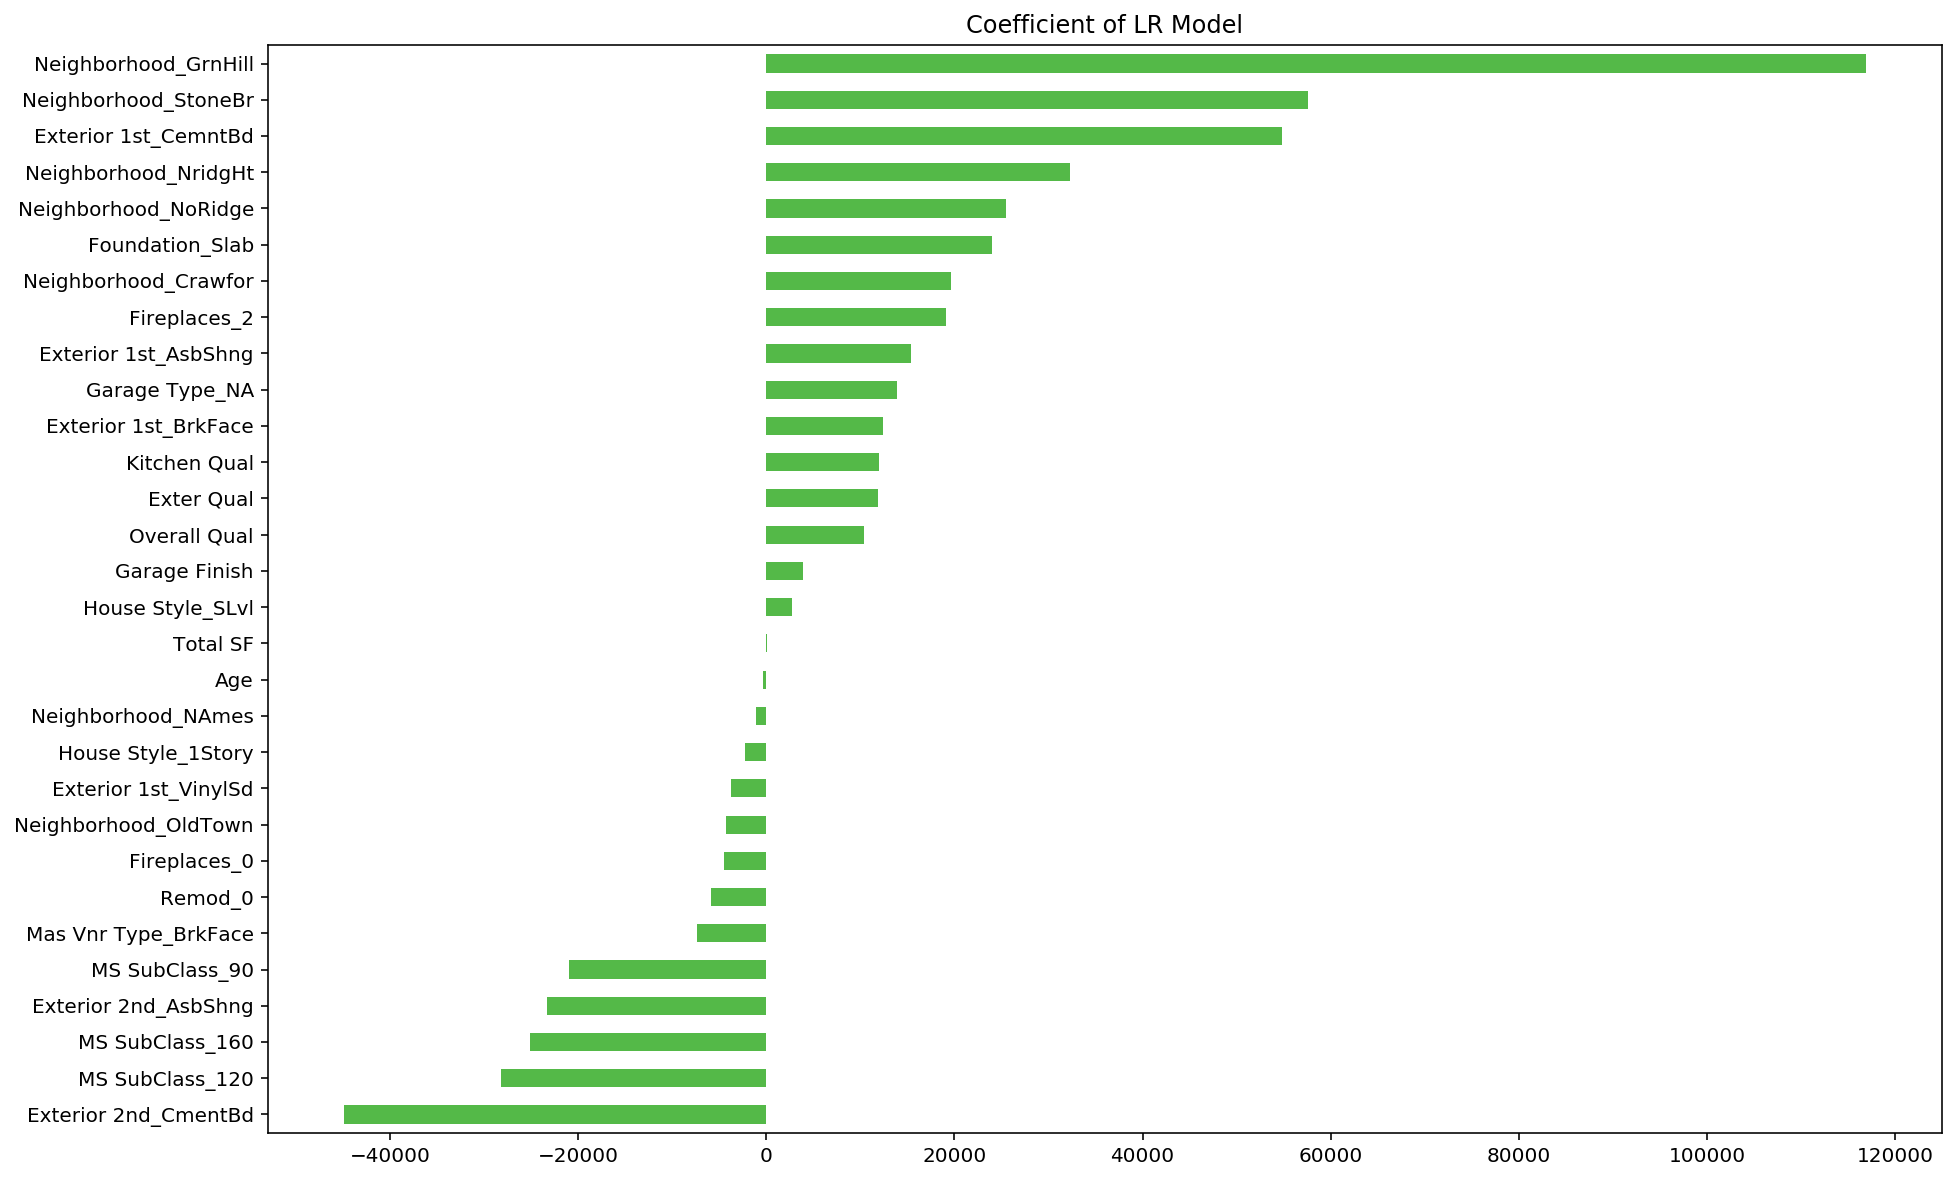

In [202]:
#Display top 5 Coefficient
plt.figure(figsize = (15,10))
df_lr['coef'].sort_values().plot(kind='barh',color = '#54B948',fontsize=10,title='Coefficient of LR Model')
plt.savefig('Coefficient_LR.png');

Being in Neighborhood GrnHill and StoneBr will increase the Sale Price of the house by USD 116899 and USD 57611 respectively.

In [189]:
#Perform prediction
pred_test = lr.predict(X_test)

In [187]:
#Output target result into dataframe with right format
df_ytest = pd.DataFrame(pred_test,columns=['SalePrice'])
df_ytest['Id'] = df_test_Id 
columnsTitles=["Id","SalePrice"]
df_ytest=df_ytest.reindex(columns=columnsTitles)
df_ytest.head()

,Id,SalePrice
0,2658,-226524.469626
1,2718,-237670.909068
2,2414,-71075.886173
3,1989,-119268.490542
4,625,-58922.595358


In [188]:
#Write out as CSV for Kaggle submission
df_ytest.to_csv('../datasets/target.csv',index=False)

## 9.Summary

Linear Regression (LR) Model is chosen for the modelling of the Ames Housing data, for the prediction of Sale Price. The model is able to achieve a R2 score of 0.887, which means it covers 88.7% of the data. And a RMSE value of **275706** based on Kaggle submission. 

![Kaggle RMSE Score](..\img\Kaggle_Submission.png)

The R2 value differences between LR(0.885) and Lasso(0.887) is very small, which means the model is not overfitting and variance is small. This can be further proven with the small difference between R2 value of LR for model selection (0.885) and model fitting (0.887). 

30 features were used for the LR model:

![Coefficient](..\img\Coefficient_LR.png)

Based on the coefficient, we can see that being in a certain neighbourhood and having certain features in a house will have more effect on the Sale Price of the house. For example, being in the neighbourhood GrnHill will increase the Sale Price by USD 16,899, while having house exterior covered with cement board (Exterior 2nd_CmentBd) will decrease the prices by USD 44,892.


![Ames Neighborhood](..\img\Ames_Neighborhood_Map.png)

Further research proved the model right as seen from the map above. Green Hills are a stone throw away from Iowa University and relatively close to Ames city center. North Ridge, North Ridge Height and Stone Bridge are within the upper class neighbourhood in Ames, with closeby malls, neighborhood center, parks and even a golf course (A sport for rich people!). 

Surprisingly, the Total Square Feet (Total SF) and Age of the house do not affect the Sale Price of the house that much in relatively to other 28 features. We can also possibly deduce where the other richer and poorer neighbourhood in AMES based on whether the neighbourhood has + or - coefficient on Sale Price. 

In summary, we can conclude that the LR model for the AMES housing dataset has addressed the problem statement of estimating Sale Price of AMES houses with lowest possible error.